### Linear Algebra, Calculus, and Gradient Descent

#### Objectives
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">

It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Recommendation engines are able to make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "./resources/netflix.png">

### Group 1: using code to explain vectors and scalars

In [1]:
import numpy as np

## Vectors

An array with magnitude and direction. The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin.


Operations with vectores
Assume

$ \vec{v} = \begin{bmatrix}v_{1} \\v_{2}\end{bmatrix} $


$ \vec{w} = \begin{bmatrix}w_{1} \\w_{2}\end{bmatrix} $

$ \vec{v} + \vec{w} = \begin{bmatrix}v_{1} + w_{1} \\v_{2} + w_{2}\end{bmatrix} $

What is happening graphically? Let's look at an example:


In [2]:

import numpy as np
v = np.array([2, 4])
w = np.array([3, 2])
v + w

array([5, 6])

#### Scalars

Have magnitude only. Can be multiplied by a vector or matrix to create a change in **scale** and/or direction.

What scalars would you need to change the direction of a vector?

In [3]:
v * 4

array([ 8, 16])

### Group 2: Desmos to explore vectors and scalars

[link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)

To capture the relationship between (*a, b*), to capture the _direction_ rather than the length, what mathematical concept would you use?

### Group 3: Youtube vid

[Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Linear Combination
If $v_{1},...,v_{n}$ are vectors and $a_{1},...,a_{n}$ are scalars, then the linear combination of those vectors with those scalars as coefficients is

<img src = "./resources/linear_combinations.svg"> 

### Dot Product

Can be thought of as one vector projected onto another

The dot product of v and w is $v \cdot w = (v_{1})(w_{2}) + (v_{1})(v_{2}) $

### _**Details of dot product for those who are interested**_

If v and w are perpendicular ($90^\circ$), their dot product will be 0.

If the angle between v and w is < $90^\circ$, the dot product will be positive.

If the angle between v and w is between $90^\circ$ and $180^\circ$, the dot product will be negative.





“The scalar projection of A onto B multiplied by the magnitude of B”

“The scalar projection of B onto A multiplied by the magnitude of A”

<img src = "./resources/dot_product.png">

<img src = "./resources/dot_product_components.png">

We are essentially, rotating vectors to the point of 
a · b = |a| × |b| × cos(θ)

Analogy from https://www.youtube.com/watch?v=FrDAU2N0FEg

In [4]:
v.dot(w)

14

## Application of dot product:

Imagine you are an e-commerce company. You have vectors to represent the transactions made with one of your items. Q is the quantity and represent the amount of cash either bought or sold.

$ Income = (q_{1},q_{2},q_{3})\cdot (p_{1},p_{2},p_{3}) $

What story is this telling?

In [5]:
q = np.array([4,6,10])
p = np.array([50,-30,45])

q.dot(p)

470

Wait, does that look familiar somehow?

## Slide break!

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

**Good video on details of gradient decent**

https://www.youtube.com/watch?v=sDv4f4s2SB8

### Gradient Descent


[slide deck!](https://docs.google.com/presentation/d/15sZl0yjwrjXkOSftImmAlEOgJxB7Qc8e2vocvMUkRWI/edit?usp=sharing)

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [7]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [8]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

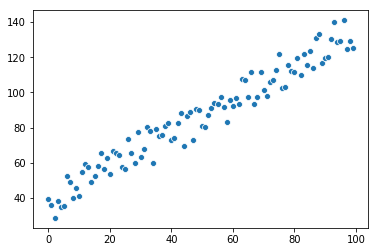

In [9]:
sns.scatterplot(x=x[:,1], y=y)

In [10]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    # cost function = RSS in this algoritm 

Iteration 0 | Cost: 200.803868
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 200.354511
[1.9067963  1.52699324]
Iteration 2 | Cost: 200.146849
[1.90767667 1.52210526]
Iteration 3 | Cost: 200.048195
[1.90858114 1.51881788]
Iteration 4 | Cost: 199.998706
[1.90950179 1.51660544]
Iteration 5 | Cost: 199.971391
[1.91043331 1.5151149 ]
Iteration 6 | Cost: 199.954077
[1.9113721  1.51410916]
Iteration 7 | Cost: 199.941274
[1.91231578 1.51342901]
Iteration 8 | Cost: 199.930505
[1.91326274 1.51296752]
Iteration 9 | Cost: 199.920655
[1.91421188 1.51265287]
Iteration 10 | Cost: 199.911218
[1.91516249 1.51243684]
Iteration 11 | Cost: 199.901969
[1.91611407 1.51228703]
Iteration 12 | Cost: 199.892804
[1.9170663  1.51218171]
Iteration 13 | Cost: 199.883678
[1.91801895 1.51210625]
Iteration 14 | Cost: 199.874570
[1.91897188 1.51205086]
Iteration 15 | Cost: 199.865469
[1.919925   1.51200893]
Iteration 16 | Cost: 199.856373
[1.92087822 1.51197606]
Iteration 17 | Cost: 199.847278
[1.92183151 1.51194926]
It

Iteration 605 | Cost: 194.579617
[2.47830773 1.50353411]
Iteration 606 | Cost: 194.570792
[2.47924706 1.50351995]
Iteration 607 | Cost: 194.561967
[2.48018637 1.50350579]
Iteration 608 | Cost: 194.553142
[2.48112566 1.50349162]
Iteration 609 | Cost: 194.544318
[2.48206493 1.50347746]
Iteration 610 | Cost: 194.535495
[2.48300416 1.5034633 ]
Iteration 611 | Cost: 194.526672
[2.48394338 1.50344914]
Iteration 612 | Cost: 194.517849
[2.48488257 1.50343498]
Iteration 613 | Cost: 194.509027
[2.48582174 1.50342082]
Iteration 614 | Cost: 194.500205
[2.48676089 1.50340666]
Iteration 615 | Cost: 194.491383
[2.48770001 1.50339251]
Iteration 616 | Cost: 194.482562
[2.4886391  1.50337835]
Iteration 617 | Cost: 194.473742
[2.48957818 1.50336419]
Iteration 618 | Cost: 194.464922
[2.49051723 1.50335003]
Iteration 619 | Cost: 194.456102
[2.49145625 1.50333587]
Iteration 620 | Cost: 194.447283
[2.49239525 1.50332172]
Iteration 621 | Cost: 194.438465
[2.49333423 1.50330756]
Iteration 622 | Cost: 194.42964

Iteration 1303 | Cost: 188.527151
[3.12820041 1.49373597]
Iteration 1304 | Cost: 188.518632
[3.12912325 1.49372206]
Iteration 1305 | Cost: 188.510114
[3.13004607 1.49370815]
Iteration 1306 | Cost: 188.501597
[3.13096887 1.49369424]
Iteration 1307 | Cost: 188.493080
[3.13189165 1.49368032]
Iteration 1308 | Cost: 188.484563
[3.1328144  1.49366641]
Iteration 1309 | Cost: 188.476047
[3.13373713 1.4936525 ]
Iteration 1310 | Cost: 188.467532
[3.13465984 1.49363859]
Iteration 1311 | Cost: 188.459016
[3.13558252 1.49362468]
Iteration 1312 | Cost: 188.450502
[3.13650518 1.49361077]
Iteration 1313 | Cost: 188.441987
[3.13742782 1.49359686]
Iteration 1314 | Cost: 188.433473
[3.13835043 1.49358295]
Iteration 1315 | Cost: 188.424960
[3.13927302 1.49356904]
Iteration 1316 | Cost: 188.416447
[3.14019558 1.49355513]
Iteration 1317 | Cost: 188.407934
[3.14111813 1.49354122]
Iteration 1318 | Cost: 188.399422
[3.14204065 1.49352731]
Iteration 1319 | Cost: 188.390910
[3.14296314 1.4935134 ]
Iteration 1320

[3.78934456 1.48376821]
Iteration 2027 | Cost: 182.471669
[3.79025063 1.48375455]
Iteration 2028 | Cost: 182.463457
[3.79115668 1.48374089]
Iteration 2029 | Cost: 182.455247
[3.79206271 1.48372723]
Iteration 2030 | Cost: 182.447037
[3.79296871 1.48371357]
Iteration 2031 | Cost: 182.438827
[3.79387469 1.48369991]
Iteration 2032 | Cost: 182.430618
[3.79478065 1.48368625]
Iteration 2033 | Cost: 182.422409
[3.79568659 1.48367259]
Iteration 2034 | Cost: 182.414200
[3.7965925  1.48365893]
Iteration 2035 | Cost: 182.405992
[3.79749839 1.48364528]
Iteration 2036 | Cost: 182.397784
[3.79840425 1.48363162]
Iteration 2037 | Cost: 182.389577
[3.79931009 1.48361796]
Iteration 2038 | Cost: 182.381370
[3.80021591 1.4836043 ]
Iteration 2039 | Cost: 182.373164
[3.80112171 1.48359065]
Iteration 2040 | Cost: 182.364958
[3.80202749 1.48357699]
Iteration 2041 | Cost: 182.356752
[3.80293324 1.48356334]
Iteration 2042 | Cost: 182.348547
[3.80383896 1.48354968]
Iteration 2043 | Cost: 182.340342
[3.80474467 1.

Iteration 2751 | Cost: 176.634615
[4.44025072 1.47395479]
Iteration 2752 | Cost: 176.626700
[4.44114028 1.47394138]
Iteration 2753 | Cost: 176.618786
[4.44202982 1.47392797]
Iteration 2754 | Cost: 176.610872
[4.44291933 1.47391456]
Iteration 2755 | Cost: 176.602958
[4.44380882 1.47390115]
Iteration 2756 | Cost: 176.595045
[4.44469829 1.47388774]
Iteration 2757 | Cost: 176.587132
[4.44558774 1.47387433]
Iteration 2758 | Cost: 176.579220
[4.44647716 1.47386092]
Iteration 2759 | Cost: 176.571308
[4.44736656 1.47384751]
Iteration 2760 | Cost: 176.563396
[4.44825594 1.4738341 ]
Iteration 2761 | Cost: 176.555485
[4.44914529 1.47382069]
Iteration 2762 | Cost: 176.547574
[4.45003462 1.47380729]
Iteration 2763 | Cost: 176.539663
[4.45092394 1.47379388]
Iteration 2764 | Cost: 176.531753
[4.45181322 1.47378047]
Iteration 2765 | Cost: 176.523844
[4.45270249 1.47376706]
Iteration 2766 | Cost: 176.515935
[4.45359173 1.47375366]
Iteration 2767 | Cost: 176.508026
[4.45448095 1.47374025]
Iteration 2768

[5.10112036 1.46399116]
Iteration 3502 | Cost: 170.802255
[5.10199315 1.46397801]
Iteration 3503 | Cost: 170.794636
[5.10286592 1.46396485]
Iteration 3504 | Cost: 170.787017
[5.10373866 1.46395169]
Iteration 3505 | Cost: 170.779399
[5.10461139 1.46393853]
Iteration 3506 | Cost: 170.771781
[5.10548409 1.46392537]
Iteration 3507 | Cost: 170.764164
[5.10635677 1.46391222]
Iteration 3508 | Cost: 170.756547
[5.10722943 1.46389906]
Iteration 3509 | Cost: 170.748930
[5.10810207 1.4638859 ]
Iteration 3510 | Cost: 170.741314
[5.10897468 1.46387275]
Iteration 3511 | Cost: 170.733698
[5.10984727 1.46385959]
Iteration 3512 | Cost: 170.726083
[5.11071984 1.46384644]
Iteration 3513 | Cost: 170.718468
[5.11159239 1.46383328]
Iteration 3514 | Cost: 170.710853
[5.11246492 1.46382013]
Iteration 3515 | Cost: 170.703239
[5.11333742 1.46380697]
Iteration 3516 | Cost: 170.695625
[5.1142099  1.46379382]
Iteration 3517 | Cost: 170.688012
[5.11508236 1.46378067]
Iteration 3518 | Cost: 170.680399
[5.1159548  1.

Iteration 4171 | Cost: 165.790629
[5.68095579 1.45524925]
Iteration 4172 | Cost: 165.783265
[5.68181387 1.45523631]
Iteration 4173 | Cost: 165.775900
[5.68267193 1.45522338]
Iteration 4174 | Cost: 165.768537
[5.68352997 1.45521044]
Iteration 4175 | Cost: 165.761173
[5.68438798 1.45519751]
Iteration 4176 | Cost: 165.753810
[5.68524598 1.45518457]
Iteration 4177 | Cost: 165.746447
[5.68610395 1.45517163]
Iteration 4178 | Cost: 165.739085
[5.6869619 1.4551587]
Iteration 4179 | Cost: 165.731723
[5.68781982 1.45514577]
Iteration 4180 | Cost: 165.724361
[5.68867773 1.45513283]
Iteration 4181 | Cost: 165.717000
[5.68953562 1.4551199 ]
Iteration 4182 | Cost: 165.709639
[5.69039348 1.45510696]
Iteration 4183 | Cost: 165.702279
[5.69125132 1.45509403]
Iteration 4184 | Cost: 165.694919
[5.69210914 1.4550811 ]
Iteration 4185 | Cost: 165.687559
[5.69296694 1.45506816]
Iteration 4186 | Cost: 165.680200
[5.69382471 1.45505523]
Iteration 4187 | Cost: 165.672841
[5.69468247 1.4550423 ]
Iteration 4188 |

[6.24173678 1.44679461]
Iteration 4831 | Cost: 161.010364
[6.24258064 1.44678189]
Iteration 4832 | Cost: 161.003242
[6.24342447 1.44676917]
Iteration 4833 | Cost: 160.996120
[6.24426828 1.44675645]
Iteration 4834 | Cost: 160.988999
[6.24511206 1.44674373]
Iteration 4835 | Cost: 160.981878
[6.24595583 1.446731  ]
Iteration 4836 | Cost: 160.974757
[6.24679958 1.44671828]
Iteration 4837 | Cost: 160.967637
[6.2476433  1.44670556]
Iteration 4838 | Cost: 160.960517
[6.248487   1.44669284]
Iteration 4839 | Cost: 160.953397
[6.24933069 1.44668012]
Iteration 4840 | Cost: 160.946278
[6.25017435 1.4466674 ]
Iteration 4841 | Cost: 160.939160
[6.25101798 1.44665468]
Iteration 4842 | Cost: 160.932041
[6.2518616  1.44664197]
Iteration 4843 | Cost: 160.924923
[6.2527052  1.44662925]
Iteration 4844 | Cost: 160.917805
[6.25354877 1.44661653]
Iteration 4845 | Cost: 160.910688
[6.25439233 1.44660381]
Iteration 4846 | Cost: 160.903571
[6.25523586 1.44659109]
Iteration 4847 | Cost: 160.896454
[6.25607937 1.

Iteration 5580 | Cost: 155.775921
[6.86865078 1.43734292]
Iteration 5581 | Cost: 155.769065
[6.86947873 1.43733044]
Iteration 5582 | Cost: 155.762209
[6.87030666 1.43731795]
Iteration 5583 | Cost: 155.755353
[6.87113456 1.43730547]
Iteration 5584 | Cost: 155.748497
[6.87196245 1.43729299]
Iteration 5585 | Cost: 155.741642
[6.87279031 1.43728051]
Iteration 5586 | Cost: 155.734788
[6.87361815 1.43726803]
Iteration 5587 | Cost: 155.727933
[6.87444597 1.43725555]
Iteration 5588 | Cost: 155.721079
[6.87527377 1.43724307]
Iteration 5589 | Cost: 155.714226
[6.87610155 1.43723059]
Iteration 5590 | Cost: 155.707372
[6.87692931 1.43721811]
Iteration 5591 | Cost: 155.700519
[6.87775705 1.43720563]
Iteration 5592 | Cost: 155.693667
[6.87858476 1.43719315]
Iteration 5593 | Cost: 155.686815
[6.87941246 1.43718067]
Iteration 5594 | Cost: 155.679963
[6.88024013 1.43716819]
Iteration 5595 | Cost: 155.673111
[6.88106779 1.43715571]
Iteration 5596 | Cost: 155.666260
[6.88189542 1.43714323]
Iteration 5597

[7.45530334 1.42849823]
Iteration 6296 | Cost: 150.954700
[7.4561164  1.42848597]
Iteration 6297 | Cost: 150.948088
[7.45692945 1.42847371]
Iteration 6298 | Cost: 150.941477
[7.45774247 1.42846145]
Iteration 6299 | Cost: 150.934866
[7.45855547 1.4284492 ]
Iteration 6300 | Cost: 150.928255
[7.45936845 1.42843694]
Iteration 6301 | Cost: 150.921645
[7.46018141 1.42842468]
Iteration 6302 | Cost: 150.915034
[7.46099435 1.42841243]
Iteration 6303 | Cost: 150.908425
[7.46180727 1.42840017]
Iteration 6304 | Cost: 150.901815
[7.46262017 1.42838791]
Iteration 6305 | Cost: 150.895206
[7.46343304 1.42837566]
Iteration 6306 | Cost: 150.888597
[7.4642459 1.4283634]
Iteration 6307 | Cost: 150.881989
[7.46505874 1.42835115]
Iteration 6308 | Cost: 150.875381
[7.46587155 1.42833889]
Iteration 6309 | Cost: 150.868773
[7.46668435 1.42832664]
Iteration 6310 | Cost: 150.862166
[7.46749712 1.42831439]
Iteration 6311 | Cost: 150.855558
[7.46830988 1.42830213]
Iteration 6312 | Cost: 150.848952
[7.46912261 1.42

[8.01224083 1.42010153]
Iteration 6987 | Cost: 146.465002
[8.01303976 1.42008949]
Iteration 6988 | Cost: 146.458618
[8.01383868 1.42007744]
Iteration 6989 | Cost: 146.452234
[8.01463757 1.4200654 ]
Iteration 6990 | Cost: 146.445851
[8.01543644 1.42005336]
Iteration 6991 | Cost: 146.439468
[8.01623529 1.42004131]
Iteration 6992 | Cost: 146.433085
[8.01703412 1.42002927]
Iteration 6993 | Cost: 146.426703
[8.01783294 1.42001723]
Iteration 6994 | Cost: 146.420321
[8.01863173 1.42000518]
Iteration 6995 | Cost: 146.413939
[8.0194305  1.41999314]
Iteration 6996 | Cost: 146.407558
[8.02022925 1.4199811 ]
Iteration 6997 | Cost: 146.401177
[8.02102798 1.41996905]
Iteration 6998 | Cost: 146.394796
[8.02182669 1.41995701]
Iteration 6999 | Cost: 146.388416
[8.02262538 1.41994497]
Iteration 7000 | Cost: 146.382036
[8.02342405 1.41993293]
Iteration 7001 | Cost: 146.375656
[8.0242227  1.41992089]
Iteration 7002 | Cost: 146.369276
[8.02502133 1.41990885]
Iteration 7003 | Cost: 146.362897
[8.02581994 1.

Iteration 7690 | Cost: 142.056052
[8.56970345 1.41169693]
Iteration 7691 | Cost: 142.049892
[8.57048824 1.41168509]
Iteration 7692 | Cost: 142.043732
[8.57127301 1.41167326]
Iteration 7693 | Cost: 142.037572
[8.57205776 1.41166143]
Iteration 7694 | Cost: 142.031413
[8.57284249 1.4116496 ]
Iteration 7695 | Cost: 142.025254
[8.5736272  1.41163777]
Iteration 7696 | Cost: 142.019095
[8.57441189 1.41162594]
Iteration 7697 | Cost: 142.012937
[8.57519656 1.41161411]
Iteration 7698 | Cost: 142.006779
[8.57598121 1.41160228]
Iteration 7699 | Cost: 142.000621
[8.57676584 1.41159045]
Iteration 7700 | Cost: 141.994464
[8.57755045 1.41157862]
Iteration 7701 | Cost: 141.988306
[8.57833504 1.41156679]
Iteration 7702 | Cost: 141.982150
[8.57911961 1.41155496]
Iteration 7703 | Cost: 141.975993
[8.57990416 1.41154313]
Iteration 7704 | Cost: 141.969837
[8.58068869 1.41153131]
Iteration 7705 | Cost: 141.963681
[8.5814732  1.41151948]
Iteration 7706 | Cost: 141.957525
[8.58225769 1.41150765]
Iteration 7707

Iteration 8407 | Cost: 137.718413
[9.12731747 1.40329004]
Iteration 8408 | Cost: 137.712473
[9.12808812 1.40327842]
Iteration 8409 | Cost: 137.706533
[9.12885874 1.4032668 ]
Iteration 8410 | Cost: 137.700594
[9.12962934 1.40325518]
Iteration 8411 | Cost: 137.694654
[9.13039993 1.40324356]
Iteration 8412 | Cost: 137.688715
[9.13117049 1.40323194]
Iteration 8413 | Cost: 137.682777
[9.13194104 1.40322033]
Iteration 8414 | Cost: 137.676838
[9.13271156 1.40320871]
Iteration 8415 | Cost: 137.670900
[9.13348207 1.40319709]
Iteration 8416 | Cost: 137.664963
[9.13425255 1.40318548]
Iteration 8417 | Cost: 137.659025
[9.13502302 1.40317386]
Iteration 8418 | Cost: 137.653088
[9.13579346 1.40316225]
Iteration 8419 | Cost: 137.647151
[9.13656389 1.40315063]
Iteration 8420 | Cost: 137.641215
[9.1373343  1.40313902]
Iteration 8421 | Cost: 137.635278
[9.13810469 1.4031274 ]
Iteration 8422 | Cost: 137.629342
[9.13887506 1.40311579]
Iteration 8423 | Cost: 137.623407
[9.13964541 1.40310417]
Iteration 8424

[9.68168953 1.39493202]
Iteration 9134 | Cost: 133.478487
[9.68244611 1.39492061]
Iteration 9135 | Cost: 133.472762
[9.68320267 1.39490921]
Iteration 9136 | Cost: 133.467037
[9.68395921 1.3948978 ]
Iteration 9137 | Cost: 133.461312
[9.68471573 1.3948864 ]
Iteration 9138 | Cost: 133.455588
[9.68547223 1.39487499]
Iteration 9139 | Cost: 133.449864
[9.68622871 1.39486359]
Iteration 9140 | Cost: 133.444141
[9.68698517 1.39485218]
Iteration 9141 | Cost: 133.438417
[9.68774161 1.39484078]
Iteration 9142 | Cost: 133.432694
[9.68849804 1.39482937]
Iteration 9143 | Cost: 133.426972
[9.68925444 1.39481797]
Iteration 9144 | Cost: 133.421249
[9.69001083 1.39480657]
Iteration 9145 | Cost: 133.415527
[9.69076719 1.39479516]
Iteration 9146 | Cost: 133.409805
[9.69152354 1.39478376]
Iteration 9147 | Cost: 133.404084
[9.69227987 1.39477236]
Iteration 9148 | Cost: 133.398363
[9.69303618 1.39476095]
Iteration 9149 | Cost: 133.392642
[9.69379247 1.39474955]
Iteration 9150 | Cost: 133.386921
[9.69454874 1.

[10.23856822  1.38653622]
Iteration 9877 | Cost: 129.303872
[10.23931067  1.38652502]
Iteration 9878 | Cost: 129.298359
[10.2400531   1.38651383]
Iteration 9879 | Cost: 129.292846
[10.24079551  1.38650264]
Iteration 9880 | Cost: 129.287333
[10.2415379   1.38649144]
Iteration 9881 | Cost: 129.281821
[10.24228028  1.38648025]
Iteration 9882 | Cost: 129.276309
[10.24302263  1.38646906]
Iteration 9883 | Cost: 129.270797
[10.24376497  1.38645787]
Iteration 9884 | Cost: 129.265285
[10.24450728  1.38644668]
Iteration 9885 | Cost: 129.259774
[10.24524958  1.38643548]
Iteration 9886 | Cost: 129.254263
[10.24599186  1.38642429]
Iteration 9887 | Cost: 129.248752
[10.24673412  1.3864131 ]
Iteration 9888 | Cost: 129.243242
[10.24747636  1.38640191]
Iteration 9889 | Cost: 129.237732
[10.24821858  1.38639072]
Iteration 9890 | Cost: 129.232222
[10.24896079  1.38637953]
Iteration 9891 | Cost: 129.226712
[10.24970297  1.38636834]
Iteration 9892 | Cost: 129.221203
[10.25044514  1.38635715]
Iteration 9893

[10.74494694  1.37890178]
Iteration 10565 | Cost: 125.576140
[10.74567654  1.37889078]
Iteration 10566 | Cost: 125.570816
[10.74640612  1.37887978]
Iteration 10567 | Cost: 125.565492
[10.74713569  1.37886878]
Iteration 10568 | Cost: 125.560169
[10.74786523  1.37885778]
Iteration 10569 | Cost: 125.554846
[10.74859476  1.37884678]
Iteration 10570 | Cost: 125.549523
[10.74932427  1.37883578]
Iteration 10571 | Cost: 125.544200
[10.75005376  1.37882478]
Iteration 10572 | Cost: 125.538878
[10.75078323  1.37881379]
Iteration 10573 | Cost: 125.533555
[10.75151268  1.37880279]
Iteration 10574 | Cost: 125.528233
[10.75224212  1.37879179]
Iteration 10575 | Cost: 125.522912
[10.75297153  1.37878079]
Iteration 10576 | Cost: 125.517590
[10.75370093  1.3787698 ]
Iteration 10577 | Cost: 125.512269
[10.75443031  1.3787588 ]
Iteration 10578 | Cost: 125.506949
[10.75515967  1.3787478 ]
Iteration 10579 | Cost: 125.501628
[10.75588901  1.37873681]
Iteration 10580 | Cost: 125.496308
[10.75661834  1.37872581

Iteration 11225 | Cost: 122.120367
[11.223198   1.3716914]
Iteration 11226 | Cost: 122.115219
[11.22391547  1.37168059]
Iteration 11227 | Cost: 122.110070
[11.22463292  1.37166977]
Iteration 11228 | Cost: 122.104922
[11.22535035  1.37165895]
Iteration 11229 | Cost: 122.099774
[11.22606776  1.37164814]
Iteration 11230 | Cost: 122.094626
[11.22678515  1.37163732]
Iteration 11231 | Cost: 122.089479
[11.22750253  1.37162651]
Iteration 11232 | Cost: 122.084332
[11.22821989  1.37161569]
Iteration 11233 | Cost: 122.079185
[11.22893723  1.37160488]
Iteration 11234 | Cost: 122.074038
[11.22965455  1.37159406]
Iteration 11235 | Cost: 122.068892
[11.23037185  1.37158325]
Iteration 11236 | Cost: 122.063746
[11.23108914  1.37157243]
Iteration 11237 | Cost: 122.058600
[11.23180641  1.37156162]
Iteration 11238 | Cost: 122.053455
[11.23252366  1.37155081]
Iteration 11239 | Cost: 122.048309
[11.23324089  1.37153999]
Iteration 11240 | Cost: 122.043164
[11.2339581   1.37152918]
Iteration 11241 | Cost: 12

[11.72029319  1.36419693]
Iteration 11925 | Cost: 118.579445
[11.72099805  1.3641863 ]
Iteration 11926 | Cost: 118.574476
[11.72170288  1.36417567]
Iteration 11927 | Cost: 118.569507
[11.7224077   1.36416505]
Iteration 11928 | Cost: 118.564538
[11.72311251  1.36415442]
Iteration 11929 | Cost: 118.559570
[11.72381729  1.3641438 ]
Iteration 11930 | Cost: 118.554602
[11.72452206  1.36413317]
Iteration 11931 | Cost: 118.549634
[11.7252268   1.36412255]
Iteration 11932 | Cost: 118.544667
[11.72593153  1.36411192]
Iteration 11933 | Cost: 118.539700
[11.72663625  1.3641013 ]
Iteration 11934 | Cost: 118.534732
[11.72734094  1.36409067]
Iteration 11935 | Cost: 118.529766
[11.72804562  1.36408005]
Iteration 11936 | Cost: 118.524799
[11.72875028  1.36406942]
Iteration 11937 | Cost: 118.519833
[11.72945492  1.3640588 ]
Iteration 11938 | Cost: 118.514867
[11.73015954  1.36404818]
Iteration 11939 | Cost: 118.509901
[11.73086415  1.36403755]
Iteration 11940 | Cost: 118.504936
[11.73156873  1.36402693

Iteration 12574 | Cost: 115.406988
[12.17469795  1.35734608]
Iteration 12575 | Cost: 115.402180
[12.17539128  1.35733562]
Iteration 12576 | Cost: 115.397372
[12.17608459  1.35732517]
Iteration 12577 | Cost: 115.392565
[12.17677788  1.35731472]
Iteration 12578 | Cost: 115.387757
[12.17747115  1.35730427]
Iteration 12579 | Cost: 115.382950
[12.17816441  1.35729381]
Iteration 12580 | Cost: 115.378143
[12.17885765  1.35728336]
Iteration 12581 | Cost: 115.373337
[12.17955087  1.35727291]
Iteration 12582 | Cost: 115.368530
[12.18024408  1.35726246]
Iteration 12583 | Cost: 115.363724
[12.18093726  1.35725201]
Iteration 12584 | Cost: 115.358919
[12.18163043  1.35724156]
Iteration 12585 | Cost: 115.354113
[12.18232358  1.35723111]
Iteration 12586 | Cost: 115.349308
[12.18301671  1.35722066]
Iteration 12587 | Cost: 115.344502
[12.18370983  1.35721021]
Iteration 12588 | Cost: 115.339698
[12.18440293  1.35719976]
Iteration 12589 | Cost: 115.334893
[12.18509601  1.35718931]
Iteration 12590 | Cost: 

Iteration 13258 | Cost: 112.174616
[12.64484822  1.35025784]
Iteration 13259 | Cost: 112.169972
[12.64552962  1.35024756]
Iteration 13260 | Cost: 112.165328
[12.646211    1.35023729]
Iteration 13261 | Cost: 112.160684
[12.64689237  1.35022702]
Iteration 13262 | Cost: 112.156041
[12.64757372  1.35021674]
Iteration 13263 | Cost: 112.151398
[12.64825505  1.35020647]
Iteration 13264 | Cost: 112.146755
[12.64893636  1.3501962 ]
Iteration 13265 | Cost: 112.142112
[12.64961765  1.35018593]
Iteration 13266 | Cost: 112.137470
[12.65029893  1.35017566]
Iteration 13267 | Cost: 112.132828
[12.65098019  1.35016539]
Iteration 13268 | Cost: 112.128186
[12.65166143  1.35015512]
Iteration 13269 | Cost: 112.123544
[12.65234266  1.35014485]
Iteration 13270 | Cost: 112.118903
[12.65302387  1.35013458]
Iteration 13271 | Cost: 112.114262
[12.65370506  1.35012431]
Iteration 13272 | Cost: 112.109621
[12.65438623  1.35011404]
Iteration 13273 | Cost: 112.104980
[12.65506739  1.35010377]
Iteration 13274 | Cost: 

Iteration 13919 | Cost: 109.155740
[13.09150264  1.34352383]
Iteration 13920 | Cost: 109.151250
[13.0921727   1.34351373]
Iteration 13921 | Cost: 109.146759
[13.09284275  1.34350363]
Iteration 13922 | Cost: 109.142269
[13.09351279  1.34349353]
Iteration 13923 | Cost: 109.137778
[13.0941828   1.34348342]
Iteration 13924 | Cost: 109.133288
[13.0948528   1.34347332]
Iteration 13925 | Cost: 109.128799
[13.09552278  1.34346322]
Iteration 13926 | Cost: 109.124309
[13.09619275  1.34345312]
Iteration 13927 | Cost: 109.119820
[13.09686269  1.34344302]
Iteration 13928 | Cost: 109.115331
[13.09753262  1.34343292]
Iteration 13929 | Cost: 109.110842
[13.09820254  1.34342282]
Iteration 13930 | Cost: 109.106354
[13.09887243  1.34341272]
Iteration 13931 | Cost: 109.101865
[13.09954231  1.34340262]
Iteration 13932 | Cost: 109.097377
[13.10021218  1.34339252]
Iteration 13933 | Cost: 109.092889
[13.10088202  1.34338242]
Iteration 13934 | Cost: 109.088402
[13.10155185  1.34337232]
Iteration 13935 | Cost: 

[13.53929358  1.33677269]
Iteration 14594 | Cost: 106.175664
[13.53995228  1.33676276]
Iteration 14595 | Cost: 106.171324
[13.54061097  1.33675283]
Iteration 14596 | Cost: 106.166985
[13.54126964  1.3367429 ]
Iteration 14597 | Cost: 106.162646
[13.5419283   1.33673297]
Iteration 14598 | Cost: 106.158307
[13.54258694  1.33672304]
Iteration 14599 | Cost: 106.153968
[13.54324556  1.33671311]
Iteration 14600 | Cost: 106.149629
[13.54390416  1.33670318]
Iteration 14601 | Cost: 106.145291
[13.54456275  1.33669325]
Iteration 14602 | Cost: 106.140953
[13.54522133  1.33668332]
Iteration 14603 | Cost: 106.136615
[13.54587988  1.33667339]
Iteration 14604 | Cost: 106.132278
[13.54653842  1.33666347]
Iteration 14605 | Cost: 106.127940
[13.54719694  1.33665354]
Iteration 14606 | Cost: 106.123603
[13.54785545  1.33664361]
Iteration 14607 | Cost: 106.119266
[13.54851393  1.33663368]
Iteration 14608 | Cost: 106.114929
[13.54917241  1.33662375]
Iteration 14609 | Cost: 106.110593
[13.54983086  1.33661383

[13.97884468  1.33014578]
Iteration 15267 | Cost: 103.304319
[13.97949223  1.33013602]
Iteration 15268 | Cost: 103.300125
[13.98013977  1.33012626]
Iteration 15269 | Cost: 103.295931
[13.98078729  1.33011649]
Iteration 15270 | Cost: 103.291738
[13.9814348   1.33010673]
Iteration 15271 | Cost: 103.287544
[13.98208229  1.33009697]
Iteration 15272 | Cost: 103.283351
[13.98272976  1.33008721]
Iteration 15273 | Cost: 103.279158
[13.98337721  1.33007745]
Iteration 15274 | Cost: 103.274966
[13.98402465  1.33006769]
Iteration 15275 | Cost: 103.270773
[13.98467207  1.33005793]
Iteration 15276 | Cost: 103.266581
[13.98531948  1.33004816]
Iteration 15277 | Cost: 103.262389
[13.98596687  1.3300384 ]
Iteration 15278 | Cost: 103.258197
[13.98661424  1.33002864]
Iteration 15279 | Cost: 103.254006
[13.9872616   1.33001888]
Iteration 15280 | Cost: 103.249814
[13.98790894  1.33000912]
Iteration 15281 | Cost: 103.245623
[13.98855626  1.32999937]
Iteration 15282 | Cost: 103.241432
[13.98920357  1.32998961

[14.43958476  1.32319942]
Iteration 15985 | Cost: 100.347187
[14.44022063  1.32318983]
Iteration 15986 | Cost: 100.343143
[14.44085648  1.32318024]
Iteration 15987 | Cost: 100.339099
[14.44149231  1.32317066]
Iteration 15988 | Cost: 100.335056
[14.44212812  1.32316107]
Iteration 15989 | Cost: 100.331013
[14.44276392  1.32315148]
Iteration 15990 | Cost: 100.326969
[14.44339971  1.3231419 ]
Iteration 15991 | Cost: 100.322927
[14.44403547  1.32313231]
Iteration 15992 | Cost: 100.318884
[14.44467122  1.32312273]
Iteration 15993 | Cost: 100.314841
[14.44530696  1.32311314]
Iteration 15994 | Cost: 100.310799
[14.44594268  1.32310356]
Iteration 15995 | Cost: 100.306757
[14.44657838  1.32309398]
Iteration 15996 | Cost: 100.302715
[14.44721407  1.32308439]
Iteration 15997 | Cost: 100.298674
[14.44784974  1.32307481]
Iteration 15998 | Cost: 100.294632
[14.44848539  1.32306522]
Iteration 15999 | Cost: 100.290591
[14.44912103  1.32305564]
Iteration 16000 | Cost: 100.286550
[14.44975665  1.32304606

[14.88263998  1.31651967]
Iteration 16688 | Cost: 97.554366
[14.88326461  1.31651026]
Iteration 16689 | Cost: 97.550464
[14.88388921  1.31650084]
Iteration 16690 | Cost: 97.546562
[14.88451381  1.31649142]
Iteration 16691 | Cost: 97.542660
[14.88513838  1.31648201]
Iteration 16692 | Cost: 97.538759
[14.88576294  1.31647259]
Iteration 16693 | Cost: 97.534857
[14.88638749  1.31646318]
Iteration 16694 | Cost: 97.530956
[14.88701201  1.31645376]
Iteration 16695 | Cost: 97.527055
[14.88763653  1.31644434]
Iteration 16696 | Cost: 97.523154
[14.88826102  1.31643493]
Iteration 16697 | Cost: 97.519254
[14.8888855   1.31642551]
Iteration 16698 | Cost: 97.515353
[14.88950997  1.3164161 ]
Iteration 16699 | Cost: 97.511453
[14.89013442  1.31640668]
Iteration 16700 | Cost: 97.507553
[14.89075885  1.31639727]
Iteration 16701 | Cost: 97.503653
[14.89138327  1.31638786]
Iteration 16702 | Cost: 97.499754
[14.89200767  1.31637844]
Iteration 16703 | Cost: 97.495854
[14.89263206  1.31636903]
Iteration 1670

[15.28470636  1.3104579 ]
Iteration 17337 | Cost: 95.063033
[15.28532078  1.31044864]
Iteration 17338 | Cost: 95.059257
[15.28593519  1.31043938]
Iteration 17339 | Cost: 95.055482
[15.28654958  1.31043011]
Iteration 17340 | Cost: 95.051706
[15.28716395  1.31042085]
Iteration 17341 | Cost: 95.047931
[15.28777831  1.31041159]
Iteration 17342 | Cost: 95.044156
[15.28839266  1.31040233]
Iteration 17343 | Cost: 95.040381
[15.28900699  1.31039307]
Iteration 17344 | Cost: 95.036607
[15.2896213  1.3103838]
Iteration 17345 | Cost: 95.032832
[15.2902356   1.31037454]
Iteration 17346 | Cost: 95.029058
[15.29084988  1.31036528]
Iteration 17347 | Cost: 95.025284
[15.29146415  1.31035602]
Iteration 17348 | Cost: 95.021510
[15.2920784   1.31034676]
Iteration 17349 | Cost: 95.017737
[15.29269263  1.3103375 ]
Iteration 17350 | Cost: 95.013963
[15.29330685  1.31032824]
Iteration 17351 | Cost: 95.010190
[15.29392106  1.31031898]
Iteration 17352 | Cost: 95.006417
[15.29453525  1.31030972]
Iteration 17353 

[15.70014321  1.30419455]
Iteration 18019 | Cost: 92.531943
[15.70074709  1.30418545]
Iteration 18020 | Cost: 92.528295
[15.70135096  1.30417634]
Iteration 18021 | Cost: 92.524648
[15.70195481  1.30416724]
Iteration 18022 | Cost: 92.521001
[15.70255864  1.30415814]
Iteration 18023 | Cost: 92.517355
[15.70316246  1.30414903]
Iteration 18024 | Cost: 92.513708
[15.70376627  1.30413993]
Iteration 18025 | Cost: 92.510062
[15.70437006  1.30413083]
Iteration 18026 | Cost: 92.506415
[15.70497384  1.30412172]
Iteration 18027 | Cost: 92.502769
[15.7055776   1.30411262]
Iteration 18028 | Cost: 92.499123
[15.70618134  1.30410352]
Iteration 18029 | Cost: 92.495478
[15.70678507  1.30409442]
Iteration 18030 | Cost: 92.491832
[15.70738878  1.30408531]
Iteration 18031 | Cost: 92.488187
[15.70799248  1.30407621]
Iteration 18032 | Cost: 92.484542
[15.70859617  1.30406711]
Iteration 18033 | Cost: 92.480897
[15.70919983  1.30405801]
Iteration 18034 | Cost: 92.477252
[15.70980349  1.30404891]
Iteration 1803

[16.10607921  1.29807444]
Iteration 18697 | Cost: 90.101042
[16.10667279  1.29806549]
Iteration 18698 | Cost: 90.097518
[16.10726636  1.29805654]
Iteration 18699 | Cost: 90.093994
[16.10785991  1.29804759]
Iteration 18700 | Cost: 90.090470
[16.10845345  1.29803865]
Iteration 18701 | Cost: 90.086947
[16.10904697  1.2980297 ]
Iteration 18702 | Cost: 90.083423
[16.10964048  1.29802075]
Iteration 18703 | Cost: 90.079900
[16.11023398  1.2980118 ]
Iteration 18704 | Cost: 90.076377
[16.11082745  1.29800285]
Iteration 18705 | Cost: 90.072855
[16.11142092  1.29799391]
Iteration 18706 | Cost: 90.069332
[16.11201436  1.29798496]
Iteration 18707 | Cost: 90.065810
[16.1126078   1.29797601]
Iteration 18708 | Cost: 90.062287
[16.11320121  1.29796707]
Iteration 18709 | Cost: 90.058765
[16.11379462  1.29795812]
Iteration 18710 | Cost: 90.055244
[16.114388    1.29794917]
Iteration 18711 | Cost: 90.051722
[16.11498138  1.29794023]
Iteration 18712 | Cost: 90.048200
[16.11557473  1.29793128]
Iteration 1871

Iteration 19370 | Cost: 87.769377
[16.50275809  1.2920939 ]
Iteration 19371 | Cost: 87.765971
[16.50334161  1.2920851 ]
Iteration 19372 | Cost: 87.762565
[16.50392512  1.2920763 ]
Iteration 19373 | Cost: 87.759160
[16.50450861  1.2920675 ]
Iteration 19374 | Cost: 87.755755
[16.50509208  1.29205871]
Iteration 19375 | Cost: 87.752350
[16.50567554  1.29204991]
Iteration 19376 | Cost: 87.748945
[16.50625899  1.29204111]
Iteration 19377 | Cost: 87.745540
[16.50684242  1.29203232]
Iteration 19378 | Cost: 87.742136
[16.50742583  1.29202352]
Iteration 19379 | Cost: 87.738732
[16.50800923  1.29201473]
Iteration 19380 | Cost: 87.735328
[16.50859262  1.29200593]
Iteration 19381 | Cost: 87.731924
[16.50917599  1.29199714]
Iteration 19382 | Cost: 87.728520
[16.50975935  1.29198834]
Iteration 19383 | Cost: 87.725116
[16.51034269  1.29197955]
Iteration 19384 | Cost: 87.721713
[16.51092602  1.29197075]
Iteration 19385 | Cost: 87.718310
[16.51150933  1.29196196]
Iteration 19386 | Cost: 87.714907
[16.51

Iteration 20058 | Cost: 85.466641
[16.90074074  1.28609369]
Iteration 20059 | Cost: 85.463352
[16.90131416  1.28608505]
Iteration 20060 | Cost: 85.460064
[16.90188757  1.2860764 ]
Iteration 20061 | Cost: 85.456775
[16.90246096  1.28606776]
Iteration 20062 | Cost: 85.453487
[16.90303434  1.28605911]
Iteration 20063 | Cost: 85.450199
[16.9036077   1.28605047]
Iteration 20064 | Cost: 85.446911
[16.90418105  1.28604183]
Iteration 20065 | Cost: 85.443623
[16.90475438  1.28603318]
Iteration 20066 | Cost: 85.440335
[16.9053277   1.28602454]
Iteration 20067 | Cost: 85.437048
[16.90590101  1.2860159 ]
Iteration 20068 | Cost: 85.433760
[16.9064743   1.28600725]
Iteration 20069 | Cost: 85.430473
[16.90704758  1.28599861]
Iteration 20070 | Cost: 85.427186
[16.90762084  1.28598997]
Iteration 20071 | Cost: 85.423899
[16.90819409  1.28598132]
Iteration 20072 | Cost: 85.420613
[16.90876732  1.28597268]
Iteration 20073 | Cost: 85.417326
[16.90934054  1.28596404]
Iteration 20074 | Cost: 85.414040
[16.90

Iteration 20768 | Cost: 83.173075
[17.30423034  1.28001047]
Iteration 20769 | Cost: 83.169903
[17.30479352  1.28000198]
Iteration 20770 | Cost: 83.166730
[17.30535669  1.27999348]
Iteration 20771 | Cost: 83.163558
[17.30591985  1.27998499]
Iteration 20772 | Cost: 83.160386
[17.30648299  1.2799765 ]
Iteration 20773 | Cost: 83.157214
[17.30704612  1.27996801]
Iteration 20774 | Cost: 83.154043
[17.30760923  1.27995952]
Iteration 20775 | Cost: 83.150871
[17.30817233  1.27995103]
Iteration 20776 | Cost: 83.147700
[17.30873541  1.27994255]
Iteration 20777 | Cost: 83.144529
[17.30929849  1.27993406]
Iteration 20778 | Cost: 83.141358
[17.30986154  1.27992557]
Iteration 20779 | Cost: 83.138187
[17.31042458  1.27991708]
Iteration 20780 | Cost: 83.135016
[17.31098761  1.27990859]
Iteration 20781 | Cost: 83.131846
[17.31155062  1.2799001 ]
Iteration 20782 | Cost: 83.128675
[17.31211362  1.27989161]
Iteration 20783 | Cost: 83.125505
[17.31267661  1.27988313]
Iteration 20784 | Cost: 83.122335
[17.31

Iteration 21466 | Cost: 80.997404
[17.693878    1.27413593]
Iteration 21467 | Cost: 80.994342
[17.6944313   1.27412759]
Iteration 21468 | Cost: 80.991280
[17.69498458  1.27411924]
Iteration 21469 | Cost: 80.988218
[17.69553785  1.2741109 ]
Iteration 21470 | Cost: 80.985156
[17.69609111  1.27410256]
Iteration 21471 | Cost: 80.982095
[17.69664435  1.27409422]
Iteration 21472 | Cost: 80.979034
[17.69719758  1.27408588]
Iteration 21473 | Cost: 80.975973
[17.6977508   1.27407754]
Iteration 21474 | Cost: 80.972912
[17.698304   1.2740692]
Iteration 21475 | Cost: 80.969851
[17.69885718  1.27406086]
Iteration 21476 | Cost: 80.966790
[17.69941036  1.27405252]
Iteration 21477 | Cost: 80.963730
[17.69996351  1.27404418]
Iteration 21478 | Cost: 80.960669
[17.70051666  1.27403584]
Iteration 21479 | Cost: 80.957609
[17.70106979  1.2740275 ]
Iteration 21480 | Cost: 80.954549
[17.70162291  1.27401916]
Iteration 21481 | Cost: 80.951489
[17.70217601  1.27401082]
Iteration 21482 | Cost: 80.948429
[17.7027

[18.08538176  1.2682334 ]
Iteration 22181 | Cost: 78.847220
[18.08592513  1.26822521]
Iteration 22182 | Cost: 78.844267
[18.08646848  1.26821702]
Iteration 22183 | Cost: 78.841314
[18.08701182  1.26820883]
Iteration 22184 | Cost: 78.838361
[18.08755514  1.26820064]
Iteration 22185 | Cost: 78.835409
[18.08809845  1.26819245]
Iteration 22186 | Cost: 78.832457
[18.08864175  1.26818425]
Iteration 22187 | Cost: 78.829504
[18.08918503  1.26817606]
Iteration 22188 | Cost: 78.826552
[18.0897283   1.26816787]
Iteration 22189 | Cost: 78.823600
[18.09027156  1.26815968]
Iteration 22190 | Cost: 78.820649
[18.0908148   1.26815149]
Iteration 22191 | Cost: 78.817697
[18.09135803  1.2681433 ]
Iteration 22192 | Cost: 78.814746
[18.09190124  1.26813511]
Iteration 22193 | Cost: 78.811794
[18.09244444  1.26812692]
Iteration 22194 | Cost: 78.808843
[18.09298763  1.26811873]
Iteration 22195 | Cost: 78.805892
[18.0935308   1.26811054]
Iteration 22196 | Cost: 78.802941
[18.09407396  1.26810236]
Iteration 2219

Iteration 22903 | Cost: 76.753718
[18.47465922  1.26236445]
Iteration 22904 | Cost: 76.750871
[18.47519271  1.2623564 ]
Iteration 22905 | Cost: 76.748024
[18.47572618  1.26234836]
Iteration 22906 | Cost: 76.745178
[18.47625965  1.26234032]
Iteration 22907 | Cost: 76.742332
[18.4767931   1.26233227]
Iteration 22908 | Cost: 76.739485
[18.47732653  1.26232423]
Iteration 22909 | Cost: 76.736639
[18.47785995  1.26231619]
Iteration 22910 | Cost: 76.733794
[18.47839336  1.26230815]
Iteration 22911 | Cost: 76.730948
[18.47892676  1.26230011]
Iteration 22912 | Cost: 76.728102
[18.47946014  1.26229206]
Iteration 22913 | Cost: 76.725257
[18.47999351  1.26228402]
Iteration 22914 | Cost: 76.722412
[18.48052686  1.26227598]
Iteration 22915 | Cost: 76.719566
[18.4810602   1.26226794]
Iteration 22916 | Cost: 76.716722
[18.48159353  1.2622599 ]
Iteration 22917 | Cost: 76.713877
[18.48212684  1.26225186]
Iteration 22918 | Cost: 76.711032
[18.48266014  1.26224382]
Iteration 22919 | Cost: 76.708187
[18.48

[18.83537409  1.25692611]
Iteration 23586 | Cost: 74.842663
[18.83589842  1.25691821]
Iteration 23587 | Cost: 74.839913
[18.83642275  1.2569103 ]
Iteration 23588 | Cost: 74.837164
[18.83694706  1.2569024 ]
Iteration 23589 | Cost: 74.834414
[18.83747136  1.25689449]
Iteration 23590 | Cost: 74.831665
[18.83799564  1.25688659]
Iteration 23591 | Cost: 74.828916
[18.83851992  1.25687869]
Iteration 23592 | Cost: 74.826167
[18.83904417  1.25687078]
Iteration 23593 | Cost: 74.823418
[18.83956842  1.25686288]
Iteration 23594 | Cost: 74.820669
[18.84009265  1.25685497]
Iteration 23595 | Cost: 74.817920
[18.84061687  1.25684707]
Iteration 23596 | Cost: 74.815172
[18.84114107  1.25683917]
Iteration 23597 | Cost: 74.812423
[18.84166527  1.25683126]
Iteration 23598 | Cost: 74.809675
[18.84218944  1.25682336]
Iteration 23599 | Cost: 74.806927
[18.84271361  1.25681546]
Iteration 23600 | Cost: 74.804179
[18.84323776  1.25680756]
Iteration 23601 | Cost: 74.801431
[18.8437619   1.25679965]
Iteration 2360

Iteration 24246 | Cost: 73.057833
[19.17907585  1.25174428]
Iteration 24247 | Cost: 73.055174
[19.17959147  1.25173651]
Iteration 24248 | Cost: 73.052515
[19.18010707  1.25172873]
Iteration 24249 | Cost: 73.049856
[19.18062266  1.25172096]
Iteration 24250 | Cost: 73.047197
[19.18113824  1.25171319]
Iteration 24251 | Cost: 73.044538
[19.18165381  1.25170541]
Iteration 24252 | Cost: 73.041880
[19.18216936  1.25169764]
Iteration 24253 | Cost: 73.039222
[19.1826849   1.25168987]
Iteration 24254 | Cost: 73.036563
[19.18320043  1.2516821 ]
Iteration 24255 | Cost: 73.033905
[19.18371594  1.25167432]
Iteration 24256 | Cost: 73.031247
[19.18423144  1.25166655]
Iteration 24257 | Cost: 73.028589
[19.18474693  1.25165878]
Iteration 24258 | Cost: 73.025932
[19.1852624   1.25165101]
Iteration 24259 | Cost: 73.023274
[19.18577786  1.25164324]
Iteration 24260 | Cost: 73.020617
[19.18629331  1.25163547]
Iteration 24261 | Cost: 73.017959
[19.18680874  1.25162769]
Iteration 24262 | Cost: 73.015302
[19.18

[19.52517276  1.24652633]
Iteration 24924 | Cost: 71.285519
[19.5256796   1.24651869]
Iteration 24925 | Cost: 71.282950
[19.52618642  1.24651105]
Iteration 24926 | Cost: 71.280380
[19.52669323  1.24650341]
Iteration 24927 | Cost: 71.277811
[19.52720003  1.24649577]
Iteration 24928 | Cost: 71.275243
[19.52770682  1.24648813]
Iteration 24929 | Cost: 71.272674
[19.52821359  1.24648049]
Iteration 24930 | Cost: 71.270105
[19.52872035  1.24647285]
Iteration 24931 | Cost: 71.267537
[19.5292271   1.24646521]
Iteration 24932 | Cost: 71.264968
[19.52973383  1.24645757]
Iteration 24933 | Cost: 71.262400
[19.53024055  1.24644993]
Iteration 24934 | Cost: 71.259832
[19.53074726  1.24644229]
Iteration 24935 | Cost: 71.257264
[19.53125396  1.24643465]
Iteration 24936 | Cost: 71.254696
[19.53176064  1.24642701]
Iteration 24937 | Cost: 71.252129
[19.53226731  1.24641937]
Iteration 24938 | Cost: 71.249561
[19.53277397  1.24641174]
Iteration 24939 | Cost: 71.246994
[19.53328061  1.2464041 ]
Iteration 2494

Iteration 25581 | Cost: 69.625301
[19.8559074  1.24154  ]
Iteration 25582 | Cost: 69.622816
[19.85640585  1.24153249]
Iteration 25583 | Cost: 69.620331
[19.85690428  1.24152497]
Iteration 25584 | Cost: 69.617846
[19.8574027   1.24151746]
Iteration 25585 | Cost: 69.615361
[19.85790111  1.24150994]
Iteration 25586 | Cost: 69.612877
[19.8583995   1.24150243]
Iteration 25587 | Cost: 69.610393
[19.85889789  1.24149491]
Iteration 25588 | Cost: 69.607908
[19.85939626  1.2414874 ]
Iteration 25589 | Cost: 69.605424
[19.85989462  1.24147989]
Iteration 25590 | Cost: 69.602940
[19.86039296  1.24147237]
Iteration 25591 | Cost: 69.600456
[19.86089129  1.24146486]
Iteration 25592 | Cost: 69.597972
[19.86138961  1.24145735]
Iteration 25593 | Cost: 69.595489
[19.86188792  1.24144983]
Iteration 25594 | Cost: 69.593005
[19.86238621  1.24144232]
Iteration 25595 | Cost: 69.590522
[19.86288449  1.24143481]
Iteration 25596 | Cost: 69.588039
[19.86338276  1.2414273 ]
Iteration 25597 | Cost: 69.585556
[19.8638

[20.17822503  1.23668057]
Iteration 26234 | Cost: 68.029134
[20.1787153   1.23667317]
Iteration 26235 | Cost: 68.026730
[20.17920556  1.23666578]
Iteration 26236 | Cost: 68.024326
[20.1796958   1.23665839]
Iteration 26237 | Cost: 68.021922
[20.18018603  1.236651  ]
Iteration 26238 | Cost: 68.019519
[20.18067625  1.23664361]
Iteration 26239 | Cost: 68.017115
[20.18116646  1.23663622]
Iteration 26240 | Cost: 68.014712
[20.18165665  1.23662883]
Iteration 26241 | Cost: 68.012308
[20.18214683  1.23662144]
Iteration 26242 | Cost: 68.009905
[20.182637    1.23661405]
Iteration 26243 | Cost: 68.007502
[20.18312716  1.23660666]
Iteration 26244 | Cost: 68.005099
[20.1836173   1.23659927]
Iteration 26245 | Cost: 68.002696
[20.18410743  1.23659188]
Iteration 26246 | Cost: 68.000294
[20.18459755  1.23658449]
Iteration 26247 | Cost: 67.997891
[20.18508766  1.2365771 ]
Iteration 26248 | Cost: 67.995489
[20.18557775  1.23656971]
Iteration 26249 | Cost: 67.993086
[20.18606784  1.23656232]
Iteration 2625

[20.50152266  1.23180635]
Iteration 26899 | Cost: 66.457089
[20.50200472  1.23179909]
Iteration 26900 | Cost: 66.454765
[20.50248678  1.23179182]
Iteration 26901 | Cost: 66.452441
[20.50296882  1.23178455]
Iteration 26902 | Cost: 66.450117
[20.50345085  1.23177728]
Iteration 26903 | Cost: 66.447793
[20.50393287  1.23177002]
Iteration 26904 | Cost: 66.445469
[20.50441487  1.23176275]
Iteration 26905 | Cost: 66.443146
[20.50489686  1.23175548]
Iteration 26906 | Cost: 66.440822
[20.50537884  1.23174822]
Iteration 26907 | Cost: 66.438499
[20.50586081  1.23174095]
Iteration 26908 | Cost: 66.436175
[20.50634277  1.23173368]
Iteration 26909 | Cost: 66.433852
[20.50682471  1.23172642]
Iteration 26910 | Cost: 66.431529
[20.50730664  1.23171915]
Iteration 26911 | Cost: 66.429206
[20.50778856  1.23171189]
Iteration 26912 | Cost: 66.426883
[20.50827047  1.23170462]
Iteration 26913 | Cost: 66.424561
[20.50875236  1.23169736]
Iteration 26914 | Cost: 66.422238
[20.50923425  1.23169009]
Iteration 2691

Iteration 27616 | Cost: 64.820507
[20.84451684  1.22663519]
Iteration 27617 | Cost: 64.818266
[20.8449902   1.22662805]
Iteration 27618 | Cost: 64.816025
[20.84546355  1.22662092]
Iteration 27619 | Cost: 64.813784
[20.84593689  1.22661378]
Iteration 27620 | Cost: 64.811543
[20.84641022  1.22660664]
Iteration 27621 | Cost: 64.809302
[20.84688354  1.22659951]
Iteration 27622 | Cost: 64.807061
[20.84735684  1.22659237]
Iteration 27623 | Cost: 64.804821
[20.84783013  1.22658524]
Iteration 27624 | Cost: 64.802580
[20.84830341  1.2265781 ]
Iteration 27625 | Cost: 64.800340
[20.84877668  1.22657097]
Iteration 27626 | Cost: 64.798100
[20.84924994  1.22656383]
Iteration 27627 | Cost: 64.795860
[20.84972318  1.2265567 ]
Iteration 27628 | Cost: 64.793620
[20.85019641  1.22654956]
Iteration 27629 | Cost: 64.791380
[20.85066963  1.22654243]
Iteration 27630 | Cost: 64.789140
[20.85114284  1.22653529]
Iteration 27631 | Cost: 64.786901
[20.85161604  1.22652816]
Iteration 27632 | Cost: 64.784661
[20.85

[21.17945997  1.2215854 ]
Iteration 28331 | Cost: 63.246720
[21.17992484  1.2215784 ]
Iteration 28332 | Cost: 63.244559
[21.18038969  1.22157139]
Iteration 28333 | Cost: 63.242398
[21.18085454  1.22156438]
Iteration 28334 | Cost: 63.240236
[21.18131937  1.22155737]
Iteration 28335 | Cost: 63.238075
[21.18178419  1.22155036]
Iteration 28336 | Cost: 63.235914
[21.18224899  1.22154336]
Iteration 28337 | Cost: 63.233754
[21.18271379  1.22153635]
Iteration 28338 | Cost: 63.231593
[21.18317857  1.22152934]
Iteration 28339 | Cost: 63.229432
[21.18364334  1.22152233]
Iteration 28340 | Cost: 63.227272
[21.1841081   1.22151533]
Iteration 28341 | Cost: 63.225112
[21.18457285  1.22150832]
Iteration 28342 | Cost: 63.222951
[21.18503759  1.22150131]
Iteration 28343 | Cost: 63.220791
[21.18550231  1.22149431]
Iteration 28344 | Cost: 63.218631
[21.18596702  1.2214873 ]
Iteration 28345 | Cost: 63.216471
[21.18643173  1.22148029]
Iteration 28346 | Cost: 63.214311
[21.18689641  1.22147329]
Iteration 2834

Iteration 29077 | Cost: 61.664443
[21.52344924  1.21639924]
Iteration 29078 | Cost: 61.662362
[21.52390538  1.21639236]
Iteration 29079 | Cost: 61.660281
[21.5243615   1.21638548]
Iteration 29080 | Cost: 61.658200
[21.52481762  1.21637861]
Iteration 29081 | Cost: 61.656120
[21.52527372  1.21637173]
Iteration 29082 | Cost: 61.654039
[21.52572982  1.21636485]
Iteration 29083 | Cost: 61.651958
[21.5261859   1.21635798]
Iteration 29084 | Cost: 61.649878
[21.52664197  1.2163511 ]
Iteration 29085 | Cost: 61.647798
[21.52709802  1.21634422]
Iteration 29086 | Cost: 61.645717
[21.52755407  1.21633735]
Iteration 29087 | Cost: 61.643637
[21.5280101   1.21633047]
Iteration 29088 | Cost: 61.641557
[21.52846613  1.2163236 ]
Iteration 29089 | Cost: 61.639477
[21.52892214  1.21631672]
Iteration 29090 | Cost: 61.637398
[21.52937814  1.21630985]
Iteration 29091 | Cost: 61.635318
[21.52983413  1.21630297]
Iteration 29092 | Cost: 61.633238
[21.5302901  1.2162961]
Iteration 29093 | Cost: 61.631159
[21.5307

Iteration 29748 | Cost: 60.291515
[21.8269315   1.21182377]
Iteration 29749 | Cost: 60.289504
[21.82737994  1.21181701]
Iteration 29750 | Cost: 60.287492
[21.82782837  1.21181025]
Iteration 29751 | Cost: 60.285481
[21.82827678  1.21180349]
Iteration 29752 | Cost: 60.283470
[21.82872519  1.21179673]
Iteration 29753 | Cost: 60.281459
[21.82917358  1.21178997]
Iteration 29754 | Cost: 60.279448
[21.82962196  1.21178321]
Iteration 29755 | Cost: 60.277437
[21.83007033  1.21177645]
Iteration 29756 | Cost: 60.275427
[21.83051869  1.21176969]
Iteration 29757 | Cost: 60.273416
[21.83096704  1.21176293]
Iteration 29758 | Cost: 60.271406
[21.83141538  1.21175617]
Iteration 29759 | Cost: 60.269395
[21.8318637   1.21174941]
Iteration 29760 | Cost: 60.267385
[21.83231202  1.21174265]
Iteration 29761 | Cost: 60.265375
[21.83276032  1.21173589]
Iteration 29762 | Cost: 60.263365
[21.83320861  1.21172914]
Iteration 29763 | Cost: 60.261355
[21.83365689  1.21172238]
Iteration 29764 | Cost: 60.259345
[21.83

[22.10499886  1.20763148]
Iteration 30374 | Cost: 59.052132
[22.10544024  1.20762482]
Iteration 30375 | Cost: 59.050183
[22.10588162  1.20761817]
Iteration 30376 | Cost: 59.048235
[22.10632298  1.20761152]
Iteration 30377 | Cost: 59.046287
[22.10676433  1.20760486]
Iteration 30378 | Cost: 59.044338
[22.10720567  1.20759821]
Iteration 30379 | Cost: 59.042390
[22.10764699  1.20759155]
Iteration 30380 | Cost: 59.040442
[22.10808831  1.2075849 ]
Iteration 30381 | Cost: 59.038494
[22.10852962  1.20757825]
Iteration 30382 | Cost: 59.036546
[22.10897091  1.20757159]
Iteration 30383 | Cost: 59.034599
[22.10941219  1.20756494]
Iteration 30384 | Cost: 59.032651
[22.10985347  1.20755829]
Iteration 30385 | Cost: 59.030704
[22.11029473  1.20755164]
Iteration 30386 | Cost: 59.028756
[22.11073598  1.20754498]
Iteration 30387 | Cost: 59.026809
[22.11117722  1.20753833]
Iteration 30388 | Cost: 59.024862
[22.11161844  1.20753168]
Iteration 30389 | Cost: 59.022914
[22.11205966  1.20752503]
Iteration 3039

Iteration 31114 | Cost: 57.636929
[22.42901324  1.20274646]
Iteration 31115 | Cost: 57.635052
[22.42944641  1.20273993]
Iteration 31116 | Cost: 57.633175
[22.42987956  1.2027334 ]
Iteration 31117 | Cost: 57.631299
[22.4303127   1.20272687]
Iteration 31118 | Cost: 57.629422
[22.43074583  1.20272034]
Iteration 31119 | Cost: 57.627546
[22.43117895  1.20271381]
Iteration 31120 | Cost: 57.625670
[22.43161206  1.20270728]
Iteration 31121 | Cost: 57.623794
[22.43204516  1.20270075]
Iteration 31122 | Cost: 57.621918
[22.43247824  1.20269422]
Iteration 31123 | Cost: 57.620042
[22.43291132  1.20268769]
Iteration 31124 | Cost: 57.618166
[22.43334438  1.20268116]
Iteration 31125 | Cost: 57.616290
[22.43377744  1.20267463]
Iteration 31126 | Cost: 57.614414
[22.43421048  1.20266811]
Iteration 31127 | Cost: 57.612539
[22.43464351  1.20266158]
Iteration 31128 | Cost: 57.610663
[22.43507653  1.20265505]
Iteration 31129 | Cost: 57.608788
[22.43550954  1.20264852]
Iteration 31130 | Cost: 57.606913
[22.43

Iteration 31791 | Cost: 56.387941
[22.7197644   1.19836294]
Iteration 31792 | Cost: 56.386128
[22.72019019  1.19835652]
Iteration 31793 | Cost: 56.384315
[22.72061597  1.1983501 ]
Iteration 31794 | Cost: 56.382501
[22.72104173  1.19834368]
Iteration 31795 | Cost: 56.380688
[22.72146748  1.19833726]
Iteration 31796 | Cost: 56.378875
[22.72189323  1.19833085]
Iteration 31797 | Cost: 56.377062
[22.72231896  1.19832443]
Iteration 31798 | Cost: 56.375250
[22.72274468  1.19831801]
Iteration 31799 | Cost: 56.373437
[22.72317039  1.19831159]
Iteration 31800 | Cost: 56.371624
[22.72359609  1.19830517]
Iteration 31801 | Cost: 56.369812
[22.72402178  1.19829875]
Iteration 31802 | Cost: 56.367999
[22.72444746  1.19829234]
Iteration 31803 | Cost: 56.366187
[22.72487313  1.19828592]
Iteration 31804 | Cost: 56.364375
[22.72529879  1.1982795 ]
Iteration 31805 | Cost: 56.362563
[22.72572443  1.19827308]
Iteration 31806 | Cost: 56.360751
[22.72615007  1.19826667]
Iteration 31807 | Cost: 56.358939
[22.72

[22.99048977  1.19428134]
Iteration 32433 | Cost: 55.242511
[22.99090869  1.19427502]
Iteration 32434 | Cost: 55.240756
[22.9913276   1.19426871]
Iteration 32435 | Cost: 55.239000
[22.99174649  1.19426239]
Iteration 32436 | Cost: 55.237245
[22.99216538  1.19425608]
Iteration 32437 | Cost: 55.235490
[22.99258426  1.19424976]
Iteration 32438 | Cost: 55.233736
[22.99300312  1.19424345]
Iteration 32439 | Cost: 55.231981
[22.99342198  1.19423713]
Iteration 32440 | Cost: 55.230226
[22.99384082  1.19423082]
Iteration 32441 | Cost: 55.228472
[22.99425965  1.1942245 ]
Iteration 32442 | Cost: 55.226717
[22.99467847  1.19421819]
Iteration 32443 | Cost: 55.224963
[22.99509729  1.19421187]
Iteration 32444 | Cost: 55.223208
[22.99551609  1.19420556]
Iteration 32445 | Cost: 55.221454
[22.99593488  1.19419924]
Iteration 32446 | Cost: 55.219700
[22.99635366  1.19419293]
Iteration 32447 | Cost: 55.217946
[22.99677243  1.19418662]
Iteration 32448 | Cost: 55.216192
[22.99719119  1.1941803 ]
Iteration 3244

[23.28937639  1.18977516]
Iteration 33153 | Cost: 54.001534
[23.28978772  1.18976896]
Iteration 33154 | Cost: 53.999842
[23.29019904  1.18976276]
Iteration 33155 | Cost: 53.998150
[23.29061036  1.18975656]
Iteration 33156 | Cost: 53.996457
[23.29102166  1.18975036]
Iteration 33157 | Cost: 53.994765
[23.29143296  1.18974416]
Iteration 33158 | Cost: 53.993074
[23.29184424  1.18973795]
Iteration 33159 | Cost: 53.991382
[23.29225551  1.18973175]
Iteration 33160 | Cost: 53.989690
[23.29266677  1.18972555]
Iteration 33161 | Cost: 53.987998
[23.29307802  1.18971935]
Iteration 33162 | Cost: 53.986307
[23.29348927  1.18971315]
Iteration 33163 | Cost: 53.984615
[23.2939005   1.18970695]
Iteration 33164 | Cost: 53.982924
[23.29431172  1.18970075]
Iteration 33165 | Cost: 53.981233
[23.29472293  1.18969455]
Iteration 33166 | Cost: 53.979541
[23.29513413  1.18968835]
Iteration 33167 | Cost: 53.977850
[23.29554532  1.18968216]
Iteration 33168 | Cost: 53.976159
[23.29595649  1.18967596]
Iteration 3316

[23.5650714   1.18561863]
Iteration 33829 | Cost: 52.876947
[23.56547574  1.18561254]
Iteration 33830 | Cost: 52.875312
[23.56588007  1.18560644]
Iteration 33831 | Cost: 52.873677
[23.56628439  1.18560035]
Iteration 33832 | Cost: 52.872042
[23.5666887   1.18559425]
Iteration 33833 | Cost: 52.870407
[23.567093    1.18558816]
Iteration 33834 | Cost: 52.868772
[23.56749729  1.18558206]
Iteration 33835 | Cost: 52.867137
[23.56790157  1.18557596]
Iteration 33836 | Cost: 52.865503
[23.56830584  1.18556987]
Iteration 33837 | Cost: 52.863868
[23.56871009  1.18556378]
Iteration 33838 | Cost: 52.862234
[23.56911434  1.18555768]
Iteration 33839 | Cost: 52.860599
[23.56951858  1.18555159]
Iteration 33840 | Cost: 52.858965
[23.56992281  1.18554549]
Iteration 33841 | Cost: 52.857331
[23.57032702  1.1855394 ]
Iteration 33842 | Cost: 52.855696
[23.57073123  1.1855333 ]
Iteration 33843 | Cost: 52.854062
[23.57113543  1.18552721]
Iteration 33844 | Cost: 52.852428
[23.57153961  1.18552112]
Iteration 3384

[23.85355717  1.18126927]
Iteration 34549 | Cost: 51.720836
[23.85395419  1.18126328]
Iteration 34550 | Cost: 51.719260
[23.8543512  1.1812573]
Iteration 34551 | Cost: 51.717683
[23.8547482   1.18125131]
Iteration 34552 | Cost: 51.716107
[23.85514519  1.18124532]
Iteration 34553 | Cost: 51.714531
[23.85554217  1.18123934]
Iteration 34554 | Cost: 51.712954
[23.85593914  1.18123335]
Iteration 34555 | Cost: 51.711378
[23.8563361   1.18122737]
Iteration 34556 | Cost: 51.709802
[23.85673305  1.18122138]
Iteration 34557 | Cost: 51.708226
[23.85713    1.1812154]
Iteration 34558 | Cost: 51.706650
[23.85752693  1.18120942]
Iteration 34559 | Cost: 51.705075
[23.85792385  1.18120343]
Iteration 34560 | Cost: 51.703499
[23.85832076  1.18119745]
Iteration 34561 | Cost: 51.701923
[23.85871766  1.18119146]
Iteration 34562 | Cost: 51.700348
[23.85911455  1.18118548]
Iteration 34563 | Cost: 51.698772
[23.85951143  1.1811795 ]
Iteration 34564 | Cost: 51.697197
[23.8599083   1.18117351]
Iteration 34565 | 

Iteration 35287 | Cost: 50.578854
[24.14422604  1.17688698]
Iteration 35288 | Cost: 50.577335
[24.14461569  1.17688111]
Iteration 35289 | Cost: 50.575817
[24.14500533  1.17687524]
Iteration 35290 | Cost: 50.574298
[24.14539495  1.17686936]
Iteration 35291 | Cost: 50.572780
[24.14578457  1.17686349]
Iteration 35292 | Cost: 50.571262
[24.14617418  1.17685761]
Iteration 35293 | Cost: 50.569744
[24.14656378  1.17685174]
Iteration 35294 | Cost: 50.568226
[24.14695336  1.17684587]
Iteration 35295 | Cost: 50.566708
[24.14734294  1.17683999]
Iteration 35296 | Cost: 50.565190
[24.14773251  1.17683412]
Iteration 35297 | Cost: 50.563672
[24.14812207  1.17682825]
Iteration 35298 | Cost: 50.562154
[24.14851161  1.17682237]
Iteration 35299 | Cost: 50.560636
[24.14890115  1.1768165 ]
Iteration 35300 | Cost: 50.559119
[24.14929068  1.17681063]
Iteration 35301 | Cost: 50.557601
[24.1496802   1.17680476]
Iteration 35302 | Cost: 50.556083
[24.1500697   1.17679888]
Iteration 35303 | Cost: 50.554566
[24.15

[24.42261078  1.17268991]
Iteration 36009 | Cost: 49.502260
[24.42299336  1.17268414]
Iteration 36010 | Cost: 49.500796
[24.42337594  1.17267837]
Iteration 36011 | Cost: 49.499332
[24.4237585  1.1726726]
Iteration 36012 | Cost: 49.497869
[24.42414106  1.17266683]
Iteration 36013 | Cost: 49.496405
[24.4245236   1.17266107]
Iteration 36014 | Cost: 49.494941
[24.42490614  1.1726553 ]
Iteration 36015 | Cost: 49.493478
[24.42528866  1.17264953]
Iteration 36016 | Cost: 49.492014
[24.42567118  1.17264377]
Iteration 36017 | Cost: 49.490551
[24.42605368  1.172638  ]
Iteration 36018 | Cost: 49.489087
[24.42643618  1.17263223]
Iteration 36019 | Cost: 49.487624
[24.42681867  1.17262647]
Iteration 36020 | Cost: 49.486161
[24.42720114  1.1726207 ]
Iteration 36021 | Cost: 49.484698
[24.42758361  1.17261493]
Iteration 36022 | Cost: 49.483235
[24.42796607  1.17260917]
Iteration 36023 | Cost: 49.481772
[24.42834852  1.1726034 ]
Iteration 36024 | Cost: 49.480309
[24.42873095  1.17259763]
Iteration 36025 

Iteration 36730 | Cost: 48.465806
[24.69632502  1.16856324]
Iteration 36731 | Cost: 48.464395
[24.69670066  1.16855758]
Iteration 36732 | Cost: 48.462984
[24.69707629  1.16855192]
Iteration 36733 | Cost: 48.461573
[24.69745191  1.16854625]
Iteration 36734 | Cost: 48.460161
[24.69782752  1.16854059]
Iteration 36735 | Cost: 48.458750
[24.69820312  1.16853493]
Iteration 36736 | Cost: 48.457339
[24.69857871  1.16852926]
Iteration 36737 | Cost: 48.455929
[24.6989543  1.1685236]
Iteration 36738 | Cost: 48.454518
[24.69932987  1.16851794]
Iteration 36739 | Cost: 48.453107
[24.69970543  1.16851228]
Iteration 36740 | Cost: 48.451696
[24.70008099  1.16850661]
Iteration 36741 | Cost: 48.450286
[24.70045653  1.16850095]
Iteration 36742 | Cost: 48.448875
[24.70083206  1.16849529]
Iteration 36743 | Cost: 48.447464
[24.70120759  1.16848963]
Iteration 36744 | Cost: 48.446054
[24.7015831   1.16848397]
Iteration 36745 | Cost: 48.444644
[24.70195861  1.16847831]
Iteration 36746 | Cost: 48.443233
[24.7023

Iteration 37510 | Cost: 47.386427
[24.98644711  1.1641892 ]
Iteration 37511 | Cost: 47.385070
[24.98681538  1.16418365]
Iteration 37512 | Cost: 47.383713
[24.98718365  1.1641781 ]
Iteration 37513 | Cost: 47.382357
[24.98755191  1.16417255]
Iteration 37514 | Cost: 47.381001
[24.98792016  1.164167  ]
Iteration 37515 | Cost: 47.379644
[24.9882884   1.16416144]
Iteration 37516 | Cost: 47.378288
[24.98865664  1.16415589]
Iteration 37517 | Cost: 47.376932
[24.98902486  1.16415034]
Iteration 37518 | Cost: 47.375576
[24.98939307  1.16414479]
Iteration 37519 | Cost: 47.374220
[24.98976128  1.16413924]
Iteration 37520 | Cost: 47.372864
[24.99012947  1.16413369]
Iteration 37521 | Cost: 47.371508
[24.99049766  1.16412814]
Iteration 37522 | Cost: 47.370152
[24.99086583  1.16412258]
Iteration 37523 | Cost: 47.368796
[24.991234    1.16411703]
Iteration 37524 | Cost: 47.367441
[24.99160215  1.16411148]
Iteration 37525 | Cost: 47.366085
[24.9919703   1.16410593]
Iteration 37526 | Cost: 47.364729
[24.99

[25.26293851  1.16002067]
Iteration 38269 | Cost: 46.376331
[25.26329977  1.16001522]
Iteration 38270 | Cost: 46.375026
[25.26366103  1.16000978]
Iteration 38271 | Cost: 46.373721
[25.26402227  1.16000433]
Iteration 38272 | Cost: 46.372416
[25.26438351  1.15999888]
Iteration 38273 | Cost: 46.371110
[25.26474474  1.15999344]
Iteration 38274 | Cost: 46.369805
[25.26510595  1.15998799]
Iteration 38275 | Cost: 46.368500
[25.26546716  1.15998255]
Iteration 38276 | Cost: 46.367196
[25.26582836  1.1599771 ]
Iteration 38277 | Cost: 46.365891
[25.26618955  1.15997166]
Iteration 38278 | Cost: 46.364586
[25.26655073  1.15996621]
Iteration 38279 | Cost: 46.363281
[25.26691191  1.15996076]
Iteration 38280 | Cost: 46.361976
[25.26727307  1.15995532]
Iteration 38281 | Cost: 46.360672
[25.26763422  1.15994987]
Iteration 38282 | Cost: 46.359367
[25.26799537  1.15994443]
Iteration 38283 | Cost: 46.358063
[25.2683565   1.15993899]
Iteration 38284 | Cost: 46.356758
[25.26871763  1.15993354]
Iteration 3828

Iteration 39015 | Cost: 45.420733
[25.53026456  1.15599032]
Iteration 39016 | Cost: 45.419476
[25.53061904  1.15598497]
Iteration 39017 | Cost: 45.418220
[25.53097352  1.15597963]
Iteration 39018 | Cost: 45.416963
[25.53132798  1.15597428]
Iteration 39019 | Cost: 45.415706
[25.53168243  1.15596894]
Iteration 39020 | Cost: 45.414450
[25.53203688  1.1559636 ]
Iteration 39021 | Cost: 45.413193
[25.53239131  1.15595825]
Iteration 39022 | Cost: 45.411937
[25.53274574  1.15595291]
Iteration 39023 | Cost: 45.410680
[25.53310016  1.15594757]
Iteration 39024 | Cost: 45.409424
[25.53345457  1.15594222]
Iteration 39025 | Cost: 45.408168
[25.53380897  1.15593688]
Iteration 39026 | Cost: 45.406912
[25.53416336  1.15593154]
Iteration 39027 | Cost: 45.405655
[25.53451774  1.15592619]
Iteration 39028 | Cost: 45.404399
[25.53487212  1.15592085]
Iteration 39029 | Cost: 45.403143
[25.53522648  1.15591551]
Iteration 39030 | Cost: 45.401887
[25.53558084  1.15591017]
Iteration 39031 | Cost: 45.400631
[25.53

Iteration 39753 | Cost: 44.510316
[25.789441    1.15208283]
Iteration 39754 | Cost: 44.509105
[25.78978891  1.15207759]
Iteration 39755 | Cost: 44.507895
[25.79013681  1.15207234]
Iteration 39756 | Cost: 44.506684
[25.79048469  1.1520671 ]
Iteration 39757 | Cost: 44.505474
[25.79083257  1.15206185]
Iteration 39758 | Cost: 44.504263
[25.79118044  1.15205661]
Iteration 39759 | Cost: 44.503053
[25.7915283   1.15205136]
Iteration 39760 | Cost: 44.501843
[25.79187616  1.15204612]
Iteration 39761 | Cost: 44.500632
[25.792224    1.15204087]
Iteration 39762 | Cost: 44.499422
[25.79257184  1.15203563]
Iteration 39763 | Cost: 44.498212
[25.79291966  1.15203039]
Iteration 39764 | Cost: 44.497002
[25.79326748  1.15202514]
Iteration 39765 | Cost: 44.495792
[25.79361529  1.1520199 ]
Iteration 39766 | Cost: 44.494582
[25.79396309  1.15201466]
Iteration 39767 | Cost: 44.493372
[25.79431088  1.15200941]
Iteration 39768 | Cost: 44.492163
[25.79465866  1.15200417]
Iteration 39769 | Cost: 44.490953
[25.79

[26.04210235  1.14827357]
Iteration 40487 | Cost: 43.638027
[26.04244385  1.14826842]
Iteration 40488 | Cost: 43.636860
[26.04278534  1.14826328]
Iteration 40489 | Cost: 43.635694
[26.04312681  1.14825813]
Iteration 40490 | Cost: 43.634528
[26.04346828  1.14825298]
Iteration 40491 | Cost: 43.633361
[26.04380974  1.14824783]
Iteration 40492 | Cost: 43.632195
[26.0441512   1.14824268]
Iteration 40493 | Cost: 43.631029
[26.04449264  1.14823754]
Iteration 40494 | Cost: 43.629863
[26.04483407  1.14823239]
Iteration 40495 | Cost: 43.628697
[26.0451755   1.14822724]
Iteration 40496 | Cost: 43.627531
[26.04551692  1.14822209]
Iteration 40497 | Cost: 43.626365
[26.04585833  1.14821695]
Iteration 40498 | Cost: 43.625200
[26.04619973  1.1482118 ]
Iteration 40499 | Cost: 43.624034
[26.04654112  1.14820665]
Iteration 40500 | Cost: 43.622868
[26.0468825   1.14820151]
Iteration 40501 | Cost: 43.621703
[26.04722387  1.14819636]
Iteration 40502 | Cost: 43.620537
[26.04756524  1.14819121]
Iteration 4050

[26.29345996  1.14448397]
Iteration 41230 | Cost: 42.787517
[26.29379508  1.14447892]
Iteration 41231 | Cost: 42.786394
[26.29413019  1.14447387]
Iteration 41232 | Cost: 42.785271
[26.29446529  1.14446881]
Iteration 41233 | Cost: 42.784147
[26.29480039  1.14446376]
Iteration 41234 | Cost: 42.783024
[26.29513547  1.14445871]
Iteration 41235 | Cost: 42.781901
[26.29547055  1.14445366]
Iteration 41236 | Cost: 42.780778
[26.29580561  1.14444861]
Iteration 41237 | Cost: 42.779656
[26.29614067  1.14444355]
Iteration 41238 | Cost: 42.778533
[26.29647572  1.1444385 ]
Iteration 41239 | Cost: 42.777410
[26.29681076  1.14443345]
Iteration 41240 | Cost: 42.776287
[26.2971458  1.1444284]
Iteration 41241 | Cost: 42.775165
[26.29748082  1.14442335]
Iteration 41242 | Cost: 42.774042
[26.29781584  1.1444183 ]
Iteration 41243 | Cost: 42.772919
[26.29815084  1.14441325]
Iteration 41244 | Cost: 42.771797
[26.29848584  1.1444082 ]
Iteration 41245 | Cost: 42.770675
[26.29882083  1.14440315]
Iteration 41246 

[26.53288659  1.14087424]
Iteration 41951 | Cost: 41.992287
[26.53321563  1.14086928]
Iteration 41952 | Cost: 41.991204
[26.53354467  1.14086432]
Iteration 41953 | Cost: 41.990121
[26.5338737   1.14085936]
Iteration 41954 | Cost: 41.989038
[26.53420271  1.1408544 ]
Iteration 41955 | Cost: 41.987955
[26.53453172  1.14084944]
Iteration 41956 | Cost: 41.986873
[26.53486073  1.14084448]
Iteration 41957 | Cost: 41.985790
[26.53518972  1.14083952]
Iteration 41958 | Cost: 41.984708
[26.5355187   1.14083456]
Iteration 41959 | Cost: 41.983625
[26.53584768  1.1408296 ]
Iteration 41960 | Cost: 41.982543
[26.53617665  1.14082464]
Iteration 41961 | Cost: 41.981460
[26.53650561  1.14081968]
Iteration 41962 | Cost: 41.980378
[26.53683456  1.14081472]
Iteration 41963 | Cost: 41.979296
[26.53716351  1.14080976]
Iteration 41964 | Cost: 41.978214
[26.53749244  1.1408048 ]
Iteration 41965 | Cost: 41.977131
[26.53782137  1.14079984]
Iteration 41966 | Cost: 41.976049
[26.53815029  1.14079489]
Iteration 4196

Iteration 42619 | Cost: 41.281031
[26.75116183  1.13758341]
Iteration 42620 | Cost: 41.279984
[26.75148534  1.13757853]
Iteration 42621 | Cost: 41.278937
[26.75180883  1.13757365]
Iteration 42622 | Cost: 41.277891
[26.75213232  1.13756878]
Iteration 42623 | Cost: 41.276844
[26.7524558  1.1375639]
Iteration 42624 | Cost: 41.275798
[26.75277928  1.13755902]
Iteration 42625 | Cost: 41.274751
[26.75310274  1.13755415]
Iteration 42626 | Cost: 41.273705
[26.7534262   1.13754927]
Iteration 42627 | Cost: 41.272658
[26.75374965  1.13754439]
Iteration 42628 | Cost: 41.271612
[26.75407309  1.13753952]
Iteration 42629 | Cost: 41.270566
[26.75439652  1.13753464]
Iteration 42630 | Cost: 41.269519
[26.75471994  1.13752976]
Iteration 42631 | Cost: 41.268473
[26.75504336  1.13752489]
Iteration 42632 | Cost: 41.267427
[26.75536676  1.13752001]
Iteration 42633 | Cost: 41.266381
[26.75569016  1.13751514]
Iteration 42634 | Cost: 41.265335
[26.75601355  1.13751026]
Iteration 42635 | Cost: 41.264289
[26.7563

[26.97689078  1.1341802 ]
Iteration 43324 | Cost: 40.556074
[26.97720856  1.13417541]
Iteration 43325 | Cost: 40.555064
[26.97752633  1.13417061]
Iteration 43326 | Cost: 40.554054
[26.97784409  1.13416582]
Iteration 43327 | Cost: 40.553044
[26.97816184  1.13416103]
Iteration 43328 | Cost: 40.552035
[26.97847959  1.13415624]
Iteration 43329 | Cost: 40.551025
[26.97879733  1.13415145]
Iteration 43330 | Cost: 40.550015
[26.97911506  1.13414666]
Iteration 43331 | Cost: 40.549005
[26.97943278  1.13414187]
Iteration 43332 | Cost: 40.547996
[26.9797505   1.13413708]
Iteration 43333 | Cost: 40.546986
[26.9800682   1.13413229]
Iteration 43334 | Cost: 40.545977
[26.9803859  1.1341275]
Iteration 43335 | Cost: 40.544967
[26.98070359  1.13412271]
Iteration 43336 | Cost: 40.543958
[26.98102127  1.13411792]
Iteration 43337 | Cost: 40.542948
[26.98133895  1.13411313]
Iteration 43338 | Cost: 40.541939
[26.98165661  1.13410834]
Iteration 43339 | Cost: 40.540930
[26.98197427  1.13410356]
Iteration 43340 

Iteration 44042 | Cost: 39.843929
[27.20330513  1.13076665]
Iteration 44043 | Cost: 39.842955
[27.20361716  1.13076195]
Iteration 44044 | Cost: 39.841981
[27.20392919  1.13075724]
Iteration 44045 | Cost: 39.841007
[27.20424121  1.13075254]
Iteration 44046 | Cost: 39.840034
[27.20455322  1.13074783]
Iteration 44047 | Cost: 39.839060
[27.20486522  1.13074313]
Iteration 44048 | Cost: 39.838086
[27.20517721  1.13073843]
Iteration 44049 | Cost: 39.837113
[27.2054892   1.13073372]
Iteration 44050 | Cost: 39.836139
[27.20580118  1.13072902]
Iteration 44051 | Cost: 39.835166
[27.20611315  1.13072432]
Iteration 44052 | Cost: 39.834192
[27.20642511  1.13071961]
Iteration 44053 | Cost: 39.833219
[27.20673707  1.13071491]
Iteration 44054 | Cost: 39.832246
[27.20704902  1.13071021]
Iteration 44055 | Cost: 39.831272
[27.20736096  1.1307055 ]
Iteration 44056 | Cost: 39.830299
[27.20767289  1.1307008 ]
Iteration 44057 | Cost: 39.829326
[27.20798481  1.1306961 ]
Iteration 44058 | Cost: 39.828353
[27.20

Iteration 44733 | Cost: 39.182634
[27.41704447  1.1275442 ]
Iteration 44734 | Cost: 39.181694
[27.41735109  1.12753958]
Iteration 44735 | Cost: 39.180753
[27.41765769  1.12753496]
Iteration 44736 | Cost: 39.179813
[27.41796428  1.12753033]
Iteration 44737 | Cost: 39.178873
[27.41827087  1.12752571]
Iteration 44738 | Cost: 39.177933
[27.41857745  1.12752109]
Iteration 44739 | Cost: 39.176993
[27.41888403  1.12751647]
Iteration 44740 | Cost: 39.176053
[27.41919059  1.12751184]
Iteration 44741 | Cost: 39.175113
[27.41949715  1.12750722]
Iteration 44742 | Cost: 39.174173
[27.4198037  1.1275026]
Iteration 44743 | Cost: 39.173233
[27.42011024  1.12749798]
Iteration 44744 | Cost: 39.172293
[27.42041677  1.12749336]
Iteration 44745 | Cost: 39.171353
[27.4207233   1.12748874]
Iteration 44746 | Cost: 39.170414
[27.42102982  1.12748412]
Iteration 44747 | Cost: 39.169474
[27.42133633  1.12747949]
Iteration 44748 | Cost: 39.168534
[27.42164283  1.12747487]
Iteration 44749 | Cost: 39.167595
[27.4219

Iteration 45435 | Cost: 38.534140
[27.63038296  1.12432779]
Iteration 45436 | Cost: 38.533232
[27.63068416  1.12432325]
Iteration 45437 | Cost: 38.532325
[27.63098535  1.12431871]
Iteration 45438 | Cost: 38.531418
[27.63128654  1.12431417]
Iteration 45439 | Cost: 38.530510
[27.63158771  1.12430963]
Iteration 45440 | Cost: 38.529603
[27.63188888  1.12430509]
Iteration 45441 | Cost: 38.528696
[27.63219004  1.12430055]
Iteration 45442 | Cost: 38.527789
[27.63249119  1.12429601]
Iteration 45443 | Cost: 38.526882
[27.63279234  1.12429147]
Iteration 45444 | Cost: 38.525975
[27.63309348  1.12428693]
Iteration 45445 | Cost: 38.525068
[27.63339461  1.12428239]
Iteration 45446 | Cost: 38.524161
[27.63369573  1.12427785]
Iteration 45447 | Cost: 38.523254
[27.63399684  1.12427331]
Iteration 45448 | Cost: 38.522347
[27.63429795  1.12426877]
Iteration 45449 | Cost: 38.521440
[27.63459905  1.12426423]
Iteration 45450 | Cost: 38.520534
[27.63490014  1.12425969]
Iteration 45451 | Cost: 38.519627
[27.63

[27.84261803  1.12112802]
Iteration 46147 | Cost: 37.899585
[27.84291385  1.12112356]
Iteration 46148 | Cost: 37.898710
[27.84320966  1.1211191 ]
Iteration 46149 | Cost: 37.897835
[27.84350546  1.12111464]
Iteration 46150 | Cost: 37.896960
[27.84380125  1.12111018]
Iteration 46151 | Cost: 37.896084
[27.84409703  1.12110573]
Iteration 46152 | Cost: 37.895209
[27.84439281  1.12110127]
Iteration 46153 | Cost: 37.894334
[27.84468858  1.12109681]
Iteration 46154 | Cost: 37.893459
[27.84498434  1.12109235]
Iteration 46155 | Cost: 37.892585
[27.84528009  1.12108789]
Iteration 46156 | Cost: 37.891710
[27.84557584  1.12108343]
Iteration 46157 | Cost: 37.890835
[27.84587158  1.12107897]
Iteration 46158 | Cost: 37.889960
[27.84616731  1.12107451]
Iteration 46159 | Cost: 37.889085
[27.84646303  1.12107005]
Iteration 46160 | Cost: 37.888211
[27.84675875  1.1210656 ]
Iteration 46161 | Cost: 37.887336
[27.84705446  1.12106114]
Iteration 46162 | Cost: 37.886462
[27.84735016  1.12105668]
Iteration 4616

[28.05570643  1.11791539]
Iteration 46874 | Cost: 37.274889
[28.05599684  1.11791101]
Iteration 46875 | Cost: 37.274046
[28.05628724  1.11790663]
Iteration 46876 | Cost: 37.273202
[28.05657763  1.11790225]
Iteration 46877 | Cost: 37.272359
[28.05686802  1.11789787]
Iteration 46878 | Cost: 37.271515
[28.0571584  1.1178935]
Iteration 46879 | Cost: 37.270672
[28.05744877  1.11788912]
Iteration 46880 | Cost: 37.269829
[28.05773913  1.11788474]
Iteration 46881 | Cost: 37.268985
[28.05802949  1.11788036]
Iteration 46882 | Cost: 37.268142
[28.05831984  1.11787599]
Iteration 46883 | Cost: 37.267299
[28.05861018  1.11787161]
Iteration 46884 | Cost: 37.266456
[28.05890051  1.11786723]
Iteration 46885 | Cost: 37.265613
[28.05919084  1.11786285]
Iteration 46886 | Cost: 37.264770
[28.05948116  1.11785848]
Iteration 46887 | Cost: 37.263927
[28.05977147  1.1178541 ]
Iteration 46888 | Cost: 37.263084
[28.06006178  1.11784972]
Iteration 46889 | Cost: 37.262241
[28.06035208  1.11784535]
Iteration 46890 

Iteration 47587 | Cost: 36.684204
[28.26119347  1.11481735]
Iteration 47588 | Cost: 36.683391
[28.26147867  1.11481305]
Iteration 47589 | Cost: 36.682577
[28.26176385  1.11480875]
Iteration 47590 | Cost: 36.681764
[28.26204903  1.11480445]
Iteration 47591 | Cost: 36.680950
[28.26233421  1.11480015]
Iteration 47592 | Cost: 36.680137
[28.26261937  1.11479586]
Iteration 47593 | Cost: 36.679323
[28.26290453  1.11479156]
Iteration 47594 | Cost: 36.678510
[28.26318968  1.11478726]
Iteration 47595 | Cost: 36.677697
[28.26347482  1.11478296]
Iteration 47596 | Cost: 36.676884
[28.26375996  1.11477866]
Iteration 47597 | Cost: 36.676071
[28.26404509  1.11477436]
Iteration 47598 | Cost: 36.675257
[28.26433021  1.11477006]
Iteration 47599 | Cost: 36.674444
[28.26461533  1.11476576]
Iteration 47600 | Cost: 36.673631
[28.26490043  1.11476147]
Iteration 47601 | Cost: 36.672818
[28.26518553  1.11475717]
Iteration 47602 | Cost: 36.672005
[28.26547063  1.11475287]
Iteration 47603 | Cost: 36.671192
[28.26

[28.46831178  1.11169473]
Iteration 48321 | Cost: 36.098039
[28.46859172  1.1116905 ]
Iteration 48322 | Cost: 36.097255
[28.46887166  1.11168628]
Iteration 48323 | Cost: 36.096472
[28.46915158  1.11168206]
Iteration 48324 | Cost: 36.095688
[28.4694315   1.11167784]
Iteration 48325 | Cost: 36.094904
[28.46971141  1.11167362]
Iteration 48326 | Cost: 36.094121
[28.46999132  1.1116694 ]
Iteration 48327 | Cost: 36.093337
[28.47027121  1.11166518]
Iteration 48328 | Cost: 36.092553
[28.4705511   1.11166096]
Iteration 48329 | Cost: 36.091770
[28.47083099  1.11165674]
Iteration 48330 | Cost: 36.090986
[28.47111086  1.11165252]
Iteration 48331 | Cost: 36.090203
[28.47139073  1.11164831]
Iteration 48332 | Cost: 36.089420
[28.47167059  1.11164409]
Iteration 48333 | Cost: 36.088636
[28.47195045  1.11163987]
Iteration 48334 | Cost: 36.087853
[28.47223029  1.11163565]
Iteration 48335 | Cost: 36.087070
[28.47251013  1.11163143]
Iteration 48336 | Cost: 36.086286
[28.47278997  1.11162721]
Iteration 4833

Iteration 49055 | Cost: 35.533304
[28.67216342  1.10862135]
Iteration 49056 | Cost: 35.532549
[28.67243818  1.10861721]
Iteration 49057 | Cost: 35.531794
[28.67271294  1.10861306]
Iteration 49058 | Cost: 35.531039
[28.6729877   1.10860892]
Iteration 49059 | Cost: 35.530284
[28.67326245  1.10860478]
Iteration 49060 | Cost: 35.529529
[28.67353719  1.10860064]
Iteration 49061 | Cost: 35.528774
[28.67381192  1.10859649]
Iteration 49062 | Cost: 35.528019
[28.67408664  1.10859235]
Iteration 49063 | Cost: 35.527264
[28.67436136  1.10858821]
Iteration 49064 | Cost: 35.526510
[28.67463607  1.10858407]
Iteration 49065 | Cost: 35.525755
[28.67491078  1.10857993]
Iteration 49066 | Cost: 35.525000
[28.67518548  1.10857579]
Iteration 49067 | Cost: 35.524245
[28.67546017  1.10857164]
Iteration 49068 | Cost: 35.523491
[28.67573485  1.1085675 ]
Iteration 49069 | Cost: 35.522736
[28.67600953  1.10856336]
Iteration 49070 | Cost: 35.521981
[28.6762842   1.10855922]
Iteration 49071 | Cost: 35.521227
[28.67

Iteration 49781 | Cost: 34.995038
[28.86982132  1.10564135]
Iteration 49782 | Cost: 34.994310
[28.87009107  1.10563728]
Iteration 49783 | Cost: 34.993582
[28.87036082  1.10563322]
Iteration 49784 | Cost: 34.992855
[28.87063055  1.10562915]
Iteration 49785 | Cost: 34.992127
[28.87090029  1.10562508]
Iteration 49786 | Cost: 34.991399
[28.87117001  1.10562102]
Iteration 49787 | Cost: 34.990672
[28.87143973  1.10561695]
Iteration 49788 | Cost: 34.989944
[28.87170944  1.10561288]
Iteration 49789 | Cost: 34.989217
[28.87197915  1.10560882]
Iteration 49790 | Cost: 34.988489
[28.87224885  1.10560475]
Iteration 49791 | Cost: 34.987761
[28.87251854  1.10560069]
Iteration 49792 | Cost: 34.987034
[28.87278822  1.10559662]
Iteration 49793 | Cost: 34.986307
[28.8730579   1.10559255]
Iteration 49794 | Cost: 34.985579
[28.87332757  1.10558849]
Iteration 49795 | Cost: 34.984852
[28.87359723  1.10558442]
Iteration 49796 | Cost: 34.984125
[28.87386689  1.10558036]
Iteration 49797 | Cost: 34.983397
[28.87

[29.06969645  1.10262792]
Iteration 50530 | Cost: 34.460115
[29.06996113  1.10262393]
Iteration 50531 | Cost: 34.459414
[29.07022581  1.10261994]
Iteration 50532 | Cost: 34.458714
[29.07049048  1.10261595]
Iteration 50533 | Cost: 34.458013
[29.07075514  1.10261196]
Iteration 50534 | Cost: 34.457312
[29.07101979  1.10260797]
Iteration 50535 | Cost: 34.456612
[29.07128444  1.10260398]
Iteration 50536 | Cost: 34.455911
[29.07154908  1.10259999]
Iteration 50537 | Cost: 34.455211
[29.07181372  1.102596  ]
Iteration 50538 | Cost: 34.454510
[29.07207835  1.10259201]
Iteration 50539 | Cost: 34.453810
[29.07234297  1.10258802]
Iteration 50540 | Cost: 34.453110
[29.07260758  1.10258403]
Iteration 50541 | Cost: 34.452409
[29.07287219  1.10258005]
Iteration 50542 | Cost: 34.451709
[29.07313679  1.10257606]
Iteration 50543 | Cost: 34.451009
[29.07340139  1.10257207]
Iteration 50544 | Cost: 34.450309
[29.07366597  1.10256808]
Iteration 50545 | Cost: 34.449608
[29.07393055  1.10256409]
Iteration 5054

[29.25957923  1.09976515]
Iteration 51254 | Cost: 33.962016
[29.25983909  1.09976123]
Iteration 51255 | Cost: 33.961340
[29.26009895  1.09975731]
Iteration 51256 | Cost: 33.960665
[29.2603588  1.0997534]
Iteration 51257 | Cost: 33.959989
[29.26061865  1.09974948]
Iteration 51258 | Cost: 33.959314
[29.26087849  1.09974556]
Iteration 51259 | Cost: 33.958639
[29.26113832  1.09974164]
Iteration 51260 | Cost: 33.957964
[29.26139814  1.09973773]
Iteration 51261 | Cost: 33.957288
[29.26165796  1.09973381]
Iteration 51262 | Cost: 33.956613
[29.26191777  1.09972989]
Iteration 51263 | Cost: 33.955938
[29.26217758  1.09972597]
Iteration 51264 | Cost: 33.955263
[29.26243737  1.09972206]
Iteration 51265 | Cost: 33.954588
[29.26269717  1.09971814]
Iteration 51266 | Cost: 33.953913
[29.26295695  1.09971422]
Iteration 51267 | Cost: 33.953238
[29.26321673  1.09971031]
Iteration 51268 | Cost: 33.952563
[29.2634765   1.09970639]
Iteration 51269 | Cost: 33.951888
[29.26373627  1.09970247]
Iteration 51270 

Iteration 51969 | Cost: 33.487744
[29.4439646   1.09698525]
Iteration 51970 | Cost: 33.487093
[29.44421978  1.09698141]
Iteration 51971 | Cost: 33.486441
[29.44447496  1.09697756]
Iteration 51972 | Cost: 33.485790
[29.44473014  1.09697371]
Iteration 51973 | Cost: 33.485139
[29.4449853   1.09696987]
Iteration 51974 | Cost: 33.484488
[29.44524046  1.09696602]
Iteration 51975 | Cost: 33.483837
[29.44549562  1.09696217]
Iteration 51976 | Cost: 33.483185
[29.44575077  1.09695833]
Iteration 51977 | Cost: 33.482534
[29.44600591  1.09695448]
Iteration 51978 | Cost: 33.481883
[29.44626104  1.09695063]
Iteration 51979 | Cost: 33.481232
[29.44651617  1.09694679]
Iteration 51980 | Cost: 33.480581
[29.44677129  1.09694294]
Iteration 51981 | Cost: 33.479930
[29.44702641  1.09693909]
Iteration 51982 | Cost: 33.479279
[29.44728151  1.09693525]
Iteration 51983 | Cost: 33.478628
[29.44753662  1.0969314 ]
Iteration 51984 | Cost: 33.477977
[29.44779171  1.09692756]
Iteration 51985 | Cost: 33.477327
[29.44

Iteration 52711 | Cost: 33.013423
[29.63154401  1.09415721]
Iteration 52712 | Cost: 33.012796
[29.63179443  1.09415343]
Iteration 52713 | Cost: 33.012168
[29.63204485  1.09414966]
Iteration 52714 | Cost: 33.011541
[29.63229527  1.09414588]
Iteration 52715 | Cost: 33.010914
[29.63254568  1.0941421 ]
Iteration 52716 | Cost: 33.010287
[29.63279608  1.09413833]
Iteration 52717 | Cost: 33.009660
[29.63304647  1.09413455]
Iteration 52718 | Cost: 33.009033
[29.63329686  1.09413078]
Iteration 52719 | Cost: 33.008406
[29.63354725  1.094127  ]
Iteration 52720 | Cost: 33.007779
[29.63379762  1.09412323]
Iteration 52721 | Cost: 33.007152
[29.63404799  1.09411945]
Iteration 52722 | Cost: 33.006525
[29.63429836  1.09411568]
Iteration 52723 | Cost: 33.005898
[29.63454871  1.09411191]
Iteration 52724 | Cost: 33.005271
[29.63479906  1.09410813]
Iteration 52725 | Cost: 33.004644
[29.63504941  1.09410436]
Iteration 52726 | Cost: 33.004017
[29.63529975  1.09410058]
Iteration 52727 | Cost: 33.003390
[29.63

[29.81169219  1.09144119]
Iteration 53438 | Cost: 32.565694
[29.81193805  1.09143749]
Iteration 53439 | Cost: 32.565089
[29.8121839   1.09143378]
Iteration 53440 | Cost: 32.564485
[29.81242975  1.09143007]
Iteration 53441 | Cost: 32.563880
[29.81267558  1.09142637]
Iteration 53442 | Cost: 32.563276
[29.81292141  1.09142266]
Iteration 53443 | Cost: 32.562671
[29.81316724  1.09141896]
Iteration 53444 | Cost: 32.562067
[29.81341306  1.09141525]
Iteration 53445 | Cost: 32.561462
[29.81365887  1.09141154]
Iteration 53446 | Cost: 32.560858
[29.81390468  1.09140784]
Iteration 53447 | Cost: 32.560254
[29.81415048  1.09140413]
Iteration 53448 | Cost: 32.559650
[29.81439627  1.09140043]
Iteration 53449 | Cost: 32.559045
[29.81464206  1.09139672]
Iteration 53450 | Cost: 32.558441
[29.81488784  1.09139302]
Iteration 53451 | Cost: 32.557837
[29.81513362  1.09138931]
Iteration 53452 | Cost: 32.557233
[29.81537939  1.0913856 ]
Iteration 53453 | Cost: 32.556629
[29.81562515  1.0913819 ]
Iteration 5345

Iteration 54155 | Cost: 32.140008
[29.98662131  1.08880387]
Iteration 54156 | Cost: 32.139426
[29.98686273  1.08880023]
Iteration 54157 | Cost: 32.138843
[29.98710414  1.08879659]
Iteration 54158 | Cost: 32.138260
[29.98734555  1.08879295]
Iteration 54159 | Cost: 32.137677
[29.98758695  1.08878931]
Iteration 54160 | Cost: 32.137094
[29.98782834  1.08878567]
Iteration 54161 | Cost: 32.136511
[29.98806973  1.08878203]
Iteration 54162 | Cost: 32.135928
[29.98831111  1.08877839]
Iteration 54163 | Cost: 32.135346
[29.98855249  1.08877475]
Iteration 54164 | Cost: 32.134763
[29.98879386  1.08877111]
Iteration 54165 | Cost: 32.134180
[29.98903522  1.08876747]
Iteration 54166 | Cost: 32.133598
[29.98927658  1.08876384]
Iteration 54167 | Cost: 32.133015
[29.98951793  1.0887602 ]
Iteration 54168 | Cost: 32.132432
[29.98975927  1.08875656]
Iteration 54169 | Cost: 32.131850
[29.99000061  1.08875292]
Iteration 54170 | Cost: 32.131267
[29.99024194  1.08874928]
Iteration 54171 | Cost: 32.130685
[29.99

Iteration 54918 | Cost: 31.703704
[30.16905441  1.08605341]
Iteration 54919 | Cost: 31.703143
[30.1692912   1.08604984]
Iteration 54920 | Cost: 31.702583
[30.16952799  1.08604627]
Iteration 54921 | Cost: 31.702022
[30.16976476  1.0860427 ]
Iteration 54922 | Cost: 31.701461
[30.17000154  1.08603913]
Iteration 54923 | Cost: 31.700900
[30.1702383   1.08603556]
Iteration 54924 | Cost: 31.700340
[30.17047506  1.08603199]
Iteration 54925 | Cost: 31.699779
[30.17071182  1.08602842]
Iteration 54926 | Cost: 31.699218
[30.17094856  1.08602485]
Iteration 54927 | Cost: 31.698658
[30.17118531  1.08602128]
Iteration 54928 | Cost: 31.698097
[30.17142204  1.08601771]
Iteration 54929 | Cost: 31.697537
[30.17165877  1.08601414]
Iteration 54930 | Cost: 31.696976
[30.17189549  1.08601057]
Iteration 54931 | Cost: 31.696416
[30.17213221  1.08600701]
Iteration 54932 | Cost: 31.695855
[30.17236892  1.08600344]
Iteration 54933 | Cost: 31.695295
[30.17260563  1.08599987]
Iteration 54934 | Cost: 31.694735
[30.17

[30.33823004  1.08350282]
Iteration 55640 | Cost: 31.306113
[30.33846253  1.08349932]
Iteration 55641 | Cost: 31.305572
[30.33869502  1.08349581]
Iteration 55642 | Cost: 31.305032
[30.33892751  1.08349231]
Iteration 55643 | Cost: 31.304491
[30.33915999  1.0834888 ]
Iteration 55644 | Cost: 31.303951
[30.33939247  1.0834853 ]
Iteration 55645 | Cost: 31.303410
[30.33962493  1.08348179]
Iteration 55646 | Cost: 31.302870
[30.3398574   1.08347829]
Iteration 55647 | Cost: 31.302329
[30.34008985  1.08347479]
Iteration 55648 | Cost: 31.301789
[30.3403223   1.08347128]
Iteration 55649 | Cost: 31.301248
[30.34055475  1.08346778]
Iteration 55650 | Cost: 31.300708
[30.34078719  1.08346427]
Iteration 55651 | Cost: 31.300168
[30.34101962  1.08346077]
Iteration 55652 | Cost: 31.299627
[30.34125205  1.08345726]
Iteration 55653 | Cost: 31.299087
[30.34148447  1.08345376]
Iteration 55654 | Cost: 31.298547
[30.34171688  1.08345026]
Iteration 55655 | Cost: 31.298006
[30.34194929  1.08344675]
Iteration 5565

Iteration 56378 | Cost: 30.914489
[30.50844731  1.08093654]
Iteration 56379 | Cost: 30.913968
[30.50867549  1.0809331 ]
Iteration 56380 | Cost: 30.913447
[30.50890366  1.08092966]
Iteration 56381 | Cost: 30.912927
[30.50913183  1.08092622]
Iteration 56382 | Cost: 30.912406
[30.50935999  1.08092278]
Iteration 56383 | Cost: 30.911885
[30.50958815  1.08091934]
Iteration 56384 | Cost: 30.911365
[30.5098163  1.0809159]
Iteration 56385 | Cost: 30.910844
[30.51004444  1.08091246]
Iteration 56386 | Cost: 30.910323
[30.51027258  1.08090902]
Iteration 56387 | Cost: 30.909803
[30.51050071  1.08090558]
Iteration 56388 | Cost: 30.909282
[30.51072884  1.08090214]
Iteration 56389 | Cost: 30.908762
[30.51095696  1.0808987 ]
Iteration 56390 | Cost: 30.908241
[30.51118508  1.08089526]
Iteration 56391 | Cost: 30.907721
[30.51141319  1.08089182]
Iteration 56392 | Cost: 30.907201
[30.51164129  1.08088838]
Iteration 56393 | Cost: 30.906680
[30.51186939  1.08088494]
Iteration 56394 | Cost: 30.906160
[30.5120

Iteration 57128 | Cost: 30.531241
[30.67796586  1.07838078]
Iteration 57129 | Cost: 30.530740
[30.67818974  1.07837741]
Iteration 57130 | Cost: 30.530239
[30.67841362  1.07837403]
Iteration 57131 | Cost: 30.529737
[30.67863748  1.07837066]
Iteration 57132 | Cost: 30.529236
[30.67886134  1.07836728]
Iteration 57133 | Cost: 30.528735
[30.6790852   1.07836391]
Iteration 57134 | Cost: 30.528234
[30.67930905  1.07836053]
Iteration 57135 | Cost: 30.527732
[30.67953289  1.07835716]
Iteration 57136 | Cost: 30.527231
[30.67975673  1.07835378]
Iteration 57137 | Cost: 30.526730
[30.67998056  1.07835041]
Iteration 57138 | Cost: 30.526229
[30.68020439  1.07834703]
Iteration 57139 | Cost: 30.525728
[30.68042821  1.07834366]
Iteration 57140 | Cost: 30.525227
[30.68065203  1.07834029]
Iteration 57141 | Cost: 30.524726
[30.68087584  1.07833691]
Iteration 57142 | Cost: 30.524225
[30.68109964  1.07833354]
Iteration 57143 | Cost: 30.523724
[30.68132344  1.07833016]
Iteration 57144 | Cost: 30.523223
[30.68

Iteration 57873 | Cost: 30.164718
[30.84319084  1.07588976]
Iteration 57874 | Cost: 30.164235
[30.84341053  1.07588645]
Iteration 57875 | Cost: 30.163753
[30.84363021  1.07588314]
Iteration 57876 | Cost: 30.163270
[30.84384989  1.07587983]
Iteration 57877 | Cost: 30.162787
[30.84406955  1.07587651]
Iteration 57878 | Cost: 30.162305
[30.84428922  1.0758732 ]
Iteration 57879 | Cost: 30.161822
[30.84450888  1.07586989]
Iteration 57880 | Cost: 30.161340
[30.84472853  1.07586658]
Iteration 57881 | Cost: 30.160857
[30.84494818  1.07586327]
Iteration 57882 | Cost: 30.160375
[30.84516782  1.07585996]
Iteration 57883 | Cost: 30.159892
[30.84538746  1.07585664]
Iteration 57884 | Cost: 30.159410
[30.84560709  1.07585333]
Iteration 57885 | Cost: 30.158927
[30.84582671  1.07585002]
Iteration 57886 | Cost: 30.158445
[30.84604633  1.07584671]
Iteration 57887 | Cost: 30.157962
[30.84626594  1.0758434 ]
Iteration 57888 | Cost: 30.157480
[30.84648555  1.07584009]
Iteration 57889 | Cost: 30.156998
[30.84

[31.00251917  1.07348764]
Iteration 58606 | Cost: 29.817372
[31.00273481  1.07348439]
Iteration 58607 | Cost: 29.816907
[31.00295045  1.07348114]
Iteration 58608 | Cost: 29.816442
[31.00316609  1.07347789]
Iteration 58609 | Cost: 29.815977
[31.00338171  1.07347464]
Iteration 58610 | Cost: 29.815512
[31.00359734  1.07347139]
Iteration 58611 | Cost: 29.815047
[31.00381295  1.07346814]
Iteration 58612 | Cost: 29.814582
[31.00402856  1.07346489]
Iteration 58613 | Cost: 29.814117
[31.00424417  1.07346163]
Iteration 58614 | Cost: 29.813652
[31.00445977  1.07345838]
Iteration 58615 | Cost: 29.813187
[31.00467536  1.07345513]
Iteration 58616 | Cost: 29.812722
[31.00489095  1.07345188]
Iteration 58617 | Cost: 29.812257
[31.00510654  1.07344863]
Iteration 58618 | Cost: 29.811792
[31.00532211  1.07344538]
Iteration 58619 | Cost: 29.811328
[31.00553769  1.07344213]
Iteration 58620 | Cost: 29.810863
[31.00575326  1.07343888]
Iteration 58621 | Cost: 29.810398
[31.00596882  1.07343563]
Iteration 5862

Iteration 59358 | Cost: 29.474198
[31.16335985  1.07106272]
Iteration 59359 | Cost: 29.473750
[31.16357141  1.07105953]
Iteration 59360 | Cost: 29.473302
[31.16378297  1.07105634]
Iteration 59361 | Cost: 29.472855
[31.16399452  1.07105315]
Iteration 59362 | Cost: 29.472407
[31.16420607  1.07104996]
Iteration 59363 | Cost: 29.471959
[31.16441761  1.07104677]
Iteration 59364 | Cost: 29.471512
[31.16462914  1.07104358]
Iteration 59365 | Cost: 29.471064
[31.16484068  1.07104039]
Iteration 59366 | Cost: 29.470617
[31.1650522   1.07103721]
Iteration 59367 | Cost: 29.470169
[31.16526372  1.07103402]
Iteration 59368 | Cost: 29.469722
[31.16547524  1.07103083]
Iteration 59369 | Cost: 29.469274
[31.16568675  1.07102764]
Iteration 59370 | Cost: 29.468827
[31.16589825  1.07102445]
Iteration 59371 | Cost: 29.468379
[31.16610975  1.07102126]
Iteration 59372 | Cost: 29.467932
[31.16632124  1.07101807]
Iteration 59373 | Cost: 29.467485
[31.16653273  1.07101488]
Iteration 59374 | Cost: 29.467037
[31.16

[31.320119    1.06869933]
Iteration 60107 | Cost: 29.145164
[31.32032658  1.0686962 ]
Iteration 60108 | Cost: 29.144733
[31.32053416  1.06869308]
Iteration 60109 | Cost: 29.144302
[31.32074174  1.06868995]
Iteration 60110 | Cost: 29.143871
[31.32094931  1.06868682]
Iteration 60111 | Cost: 29.143441
[31.32115687  1.06868369]
Iteration 60112 | Cost: 29.143010
[31.32136443  1.06868056]
Iteration 60113 | Cost: 29.142579
[31.32157199  1.06867743]
Iteration 60114 | Cost: 29.142148
[31.32177954  1.0686743 ]
Iteration 60115 | Cost: 29.141717
[31.32198708  1.06867117]
Iteration 60116 | Cost: 29.141286
[31.32219462  1.06866804]
Iteration 60117 | Cost: 29.140855
[31.32240215  1.06866491]
Iteration 60118 | Cost: 29.140425
[31.32260968  1.06866178]
Iteration 60119 | Cost: 29.139994
[31.32281721  1.06865865]
Iteration 60120 | Cost: 29.139563
[31.32302472  1.06865553]
Iteration 60121 | Cost: 29.139132
[31.32323224  1.0686524 ]
Iteration 60122 | Cost: 29.138702
[31.32343974  1.06864927]
Iteration 6012

Iteration 60842 | Cost: 28.834213
[31.47148664  1.06641723]
Iteration 60843 | Cost: 28.833798
[31.47169039  1.06641416]
Iteration 60844 | Cost: 28.833383
[31.47189413  1.06641109]
Iteration 60845 | Cost: 28.832967
[31.47209786  1.06640802]
Iteration 60846 | Cost: 28.832552
[31.47230159  1.06640495]
Iteration 60847 | Cost: 28.832137
[31.47250532  1.06640188]
Iteration 60848 | Cost: 28.831722
[31.47270904  1.0663988 ]
Iteration 60849 | Cost: 28.831307
[31.47291275  1.06639573]
Iteration 60850 | Cost: 28.830892
[31.47311646  1.06639266]
Iteration 60851 | Cost: 28.830477
[31.47332017  1.06638959]
Iteration 60852 | Cost: 28.830062
[31.47352387  1.06638652]
Iteration 60853 | Cost: 28.829647
[31.47372756  1.06638345]
Iteration 60854 | Cost: 28.829232
[31.47393125  1.06638038]
Iteration 60855 | Cost: 28.828817
[31.47413493  1.06637731]
Iteration 60856 | Cost: 28.828402
[31.47433861  1.06637424]
Iteration 60857 | Cost: 28.827987
[31.47454229  1.06637117]
Iteration 60858 | Cost: 28.827572
[31.47

[31.62325298  1.06412912]
Iteration 61595 | Cost: 28.527448
[31.62345288  1.06412611]
Iteration 61596 | Cost: 28.527048
[31.62365277  1.0641231 ]
Iteration 61597 | Cost: 28.526649
[31.62385265  1.06412008]
Iteration 61598 | Cost: 28.526249
[31.62405253  1.06411707]
Iteration 61599 | Cost: 28.525850
[31.62425241  1.06411405]
Iteration 61600 | Cost: 28.525450
[31.62445228  1.06411104]
Iteration 61601 | Cost: 28.525050
[31.62465214  1.06410803]
Iteration 61602 | Cost: 28.524651
[31.624852    1.06410501]
Iteration 61603 | Cost: 28.524251
[31.62505186  1.064102  ]
Iteration 61604 | Cost: 28.523852
[31.62525171  1.06409899]
Iteration 61605 | Cost: 28.523452
[31.62545155  1.06409598]
Iteration 61606 | Cost: 28.523053
[31.62565139  1.06409296]
Iteration 61607 | Cost: 28.522654
[31.62585123  1.06408995]
Iteration 61608 | Cost: 28.522254
[31.62605106  1.06408694]
Iteration 61609 | Cost: 28.521855
[31.62625088  1.06408392]
Iteration 61610 | Cost: 28.521455
[31.6264507   1.06408091]
Iteration 6161

[31.77450426  1.06184878]
Iteration 62359 | Cost: 28.227953
[31.77470031  1.06184582]
Iteration 62360 | Cost: 28.227569
[31.77489637  1.06184286]
Iteration 62361 | Cost: 28.227184
[31.77509242  1.06183991]
Iteration 62362 | Cost: 28.226800
[31.77528846  1.06183695]
Iteration 62363 | Cost: 28.226415
[31.7754845  1.061834 ]
Iteration 62364 | Cost: 28.226031
[31.77568053  1.06183104]
Iteration 62365 | Cost: 28.225647
[31.77587656  1.06182809]
Iteration 62366 | Cost: 28.225262
[31.77607258  1.06182513]
Iteration 62367 | Cost: 28.224878
[31.7762686   1.06182218]
Iteration 62368 | Cost: 28.224494
[31.77646461  1.06181922]
Iteration 62369 | Cost: 28.224109
[31.77666062  1.06181627]
Iteration 62370 | Cost: 28.223725
[31.77685662  1.06181331]
Iteration 62371 | Cost: 28.223341
[31.77705262  1.06181036]
Iteration 62372 | Cost: 28.222957
[31.77724861  1.0618074 ]
Iteration 62373 | Cost: 28.222573
[31.7774446   1.06180445]
Iteration 62374 | Cost: 28.222188
[31.77764059  1.06180149]
Iteration 62375 

Iteration 63090 | Cost: 27.952062
[31.91669595  1.05970502]
Iteration 63091 | Cost: 27.951691
[31.9168884   1.05970212]
Iteration 63092 | Cost: 27.951321
[31.91708085  1.05969921]
Iteration 63093 | Cost: 27.950950
[31.91727329  1.05969631]
Iteration 63094 | Cost: 27.950580
[31.91746572  1.05969341]
Iteration 63095 | Cost: 27.950210
[31.91765816  1.05969051]
Iteration 63096 | Cost: 27.949839
[31.91785058  1.05968761]
Iteration 63097 | Cost: 27.949469
[31.918043    1.05968471]
Iteration 63098 | Cost: 27.949099
[31.91823542  1.05968181]
Iteration 63099 | Cost: 27.948728
[31.91842783  1.05967891]
Iteration 63100 | Cost: 27.948358
[31.91862024  1.05967601]
Iteration 63101 | Cost: 27.947988
[31.91881264  1.0596731 ]
Iteration 63102 | Cost: 27.947617
[31.91900503  1.0596702 ]
Iteration 63103 | Cost: 27.947247
[31.91919743  1.0596673 ]
Iteration 63104 | Cost: 27.946877
[31.91938981  1.0596644 ]
Iteration 63105 | Cost: 27.946507
[31.91958219  1.0596615 ]
Iteration 63106 | Cost: 27.946137
[31.91

[32.05400397  1.05763489]
Iteration 63811 | Cost: 27.689787
[32.05419293  1.05763204]
Iteration 63812 | Cost: 27.689430
[32.0543819   1.05762919]
Iteration 63813 | Cost: 27.689073
[32.05457085  1.05762634]
Iteration 63814 | Cost: 27.688716
[32.0547598   1.05762349]
Iteration 63815 | Cost: 27.688358
[32.05494875  1.05762064]
Iteration 63816 | Cost: 27.688001
[32.05513769  1.05761779]
Iteration 63817 | Cost: 27.687644
[32.05532663  1.05761495]
Iteration 63818 | Cost: 27.687287
[32.05551557  1.0576121 ]
Iteration 63819 | Cost: 27.686930
[32.05570449  1.05760925]
Iteration 63820 | Cost: 27.686573
[32.05589342  1.0576064 ]
Iteration 63821 | Cost: 27.686216
[32.05608234  1.05760355]
Iteration 63822 | Cost: 27.685859
[32.05627125  1.0576007 ]
Iteration 63823 | Cost: 27.685502
[32.05646016  1.05759786]
Iteration 63824 | Cost: 27.685146
[32.05664906  1.05759501]
Iteration 63825 | Cost: 27.684789
[32.05683796  1.05759216]
Iteration 63826 | Cost: 27.684432
[32.05702686  1.05758931]
Iteration 6382

Iteration 64527 | Cost: 27.438656
[32.18826982  1.05561062]
Iteration 64528 | Cost: 27.438312
[32.18845538  1.05560782]
Iteration 64529 | Cost: 27.437967
[32.18864094  1.05560503]
Iteration 64530 | Cost: 27.437623
[32.18882649  1.05560223]
Iteration 64531 | Cost: 27.437279
[32.18901203  1.05559943]
Iteration 64532 | Cost: 27.436934
[32.18919757  1.05559664]
Iteration 64533 | Cost: 27.436590
[32.18938311  1.05559384]
Iteration 64534 | Cost: 27.436246
[32.18956864  1.05559104]
Iteration 64535 | Cost: 27.435901
[32.18975417  1.05558824]
Iteration 64536 | Cost: 27.435557
[32.18993969  1.05558545]
Iteration 64537 | Cost: 27.435213
[32.19012521  1.05558265]
Iteration 64538 | Cost: 27.434869
[32.19031072  1.05557985]
Iteration 64539 | Cost: 27.434525
[32.19049623  1.05557706]
Iteration 64540 | Cost: 27.434180
[32.19068173  1.05557426]
Iteration 64541 | Cost: 27.433836
[32.19086723  1.05557146]
Iteration 64542 | Cost: 27.433492
[32.19105273  1.05556867]
Iteration 64543 | Cost: 27.433148
[32.19

[32.3162877   1.05368056]
Iteration 65224 | Cost: 27.202799
[32.31647001  1.05367781]
Iteration 65225 | Cost: 27.202467
[32.31665232  1.05367506]
Iteration 65226 | Cost: 27.202134
[32.31683462  1.05367231]
Iteration 65227 | Cost: 27.201802
[32.31701692  1.05366956]
Iteration 65228 | Cost: 27.201469
[32.31719921  1.05366681]
Iteration 65229 | Cost: 27.201137
[32.3173815   1.05366406]
Iteration 65230 | Cost: 27.200805
[32.31756379  1.05366132]
Iteration 65231 | Cost: 27.200472
[32.31774606  1.05365857]
Iteration 65232 | Cost: 27.200140
[32.31792834  1.05365582]
Iteration 65233 | Cost: 27.199808
[32.31811061  1.05365307]
Iteration 65234 | Cost: 27.199475
[32.31829288  1.05365032]
Iteration 65235 | Cost: 27.199143
[32.31847514  1.05364758]
Iteration 65236 | Cost: 27.198811
[32.31865739  1.05364483]
Iteration 65237 | Cost: 27.198479
[32.31883965  1.05364208]
Iteration 65238 | Cost: 27.198146
[32.31902189  1.05363933]
Iteration 65239 | Cost: 27.197814
[32.31920414  1.05363659]
Iteration 6524

Iteration 65902 | Cost: 26.981238
[32.43901906  1.05183019]
Iteration 65903 | Cost: 26.980916
[32.43919825  1.05182749]
Iteration 65904 | Cost: 26.980595
[32.43937745  1.05182479]
Iteration 65905 | Cost: 26.980274
[32.43955664  1.05182209]
Iteration 65906 | Cost: 26.979953
[32.43973582  1.05181938]
Iteration 65907 | Cost: 26.979632
[32.439915    1.05181668]
Iteration 65908 | Cost: 26.979311
[32.44009418  1.05181398]
Iteration 65909 | Cost: 26.978990
[32.44027335  1.05181128]
Iteration 65910 | Cost: 26.978669
[32.44045252  1.05180858]
Iteration 65911 | Cost: 26.978347
[32.44063168  1.05180588]
Iteration 65912 | Cost: 26.978026
[32.44081083  1.05180318]
Iteration 65913 | Cost: 26.977705
[32.44098999  1.05180048]
Iteration 65914 | Cost: 26.977384
[32.44116914  1.05179778]
Iteration 65915 | Cost: 26.977063
[32.44134828  1.05179507]
Iteration 65916 | Cost: 26.976742
[32.44152742  1.05179237]
Iteration 65917 | Cost: 26.976421
[32.44170655  1.05178967]
Iteration 65918 | Cost: 26.976101
[32.44

Iteration 66593 | Cost: 26.763136
[32.56176756  1.04997957]
Iteration 66594 | Cost: 26.762826
[32.56194365  1.04997691]
Iteration 66595 | Cost: 26.762516
[32.56211972  1.04997426]
Iteration 66596 | Cost: 26.762206
[32.5622958  1.0499716]
Iteration 66597 | Cost: 26.761896
[32.56247187  1.04996895]
Iteration 66598 | Cost: 26.761586
[32.56264794  1.0499663 ]
Iteration 66599 | Cost: 26.761276
[32.562824    1.04996364]
Iteration 66600 | Cost: 26.760966
[32.56300006  1.04996099]
Iteration 66601 | Cost: 26.760656
[32.56317611  1.04995833]
Iteration 66602 | Cost: 26.760346
[32.56335216  1.04995568]
Iteration 66603 | Cost: 26.760036
[32.5635282   1.04995302]
Iteration 66604 | Cost: 26.759726
[32.56370424  1.04995037]
Iteration 66605 | Cost: 26.759416
[32.56388028  1.04994772]
Iteration 66606 | Cost: 26.759106
[32.56405631  1.04994506]
Iteration 66607 | Cost: 26.758796
[32.56423233  1.04994241]
Iteration 66608 | Cost: 26.758486
[32.56440835  1.04993975]
Iteration 66609 | Cost: 26.758176
[32.5645

[32.68947322  1.04805421]
Iteration 67326 | Cost: 26.539986
[32.68964606  1.0480516 ]
Iteration 67327 | Cost: 26.539687
[32.6898189  1.048049 ]
Iteration 67328 | Cost: 26.539389
[32.68999174  1.04804639]
Iteration 67329 | Cost: 26.539090
[32.69016457  1.04804379]
Iteration 67330 | Cost: 26.538791
[32.6903374   1.04804118]
Iteration 67331 | Cost: 26.538492
[32.69051022  1.04803857]
Iteration 67332 | Cost: 26.538194
[32.69068304  1.04803597]
Iteration 67333 | Cost: 26.537895
[32.69085585  1.04803336]
Iteration 67334 | Cost: 26.537596
[32.69102866  1.04803076]
Iteration 67335 | Cost: 26.537297
[32.69120146  1.04802815]
Iteration 67336 | Cost: 26.536999
[32.69137426  1.04802555]
Iteration 67337 | Cost: 26.536700
[32.69154706  1.04802294]
Iteration 67338 | Cost: 26.536402
[32.69171985  1.04802034]
Iteration 67339 | Cost: 26.536103
[32.69189264  1.04801773]
Iteration 67340 | Cost: 26.535804
[32.69206542  1.04801513]
Iteration 67341 | Cost: 26.535506
[32.6922382   1.04801252]
Iteration 67342 

Iteration 68066 | Cost: 26.322969
[32.81635585  1.04614126]
Iteration 68067 | Cost: 26.322681
[32.81652547  1.0461387 ]
Iteration 68068 | Cost: 26.322393
[32.81669509  1.04613614]
Iteration 68069 | Cost: 26.322105
[32.81686471  1.04613359]
Iteration 68070 | Cost: 26.321818
[32.81703432  1.04613103]
Iteration 68071 | Cost: 26.321530
[32.81720393  1.04612847]
Iteration 68072 | Cost: 26.321242
[32.81737353  1.04612591]
Iteration 68073 | Cost: 26.320955
[32.81754313  1.04612336]
Iteration 68074 | Cost: 26.320667
[32.81771273  1.0461208 ]
Iteration 68075 | Cost: 26.320379
[32.81788232  1.04611824]
Iteration 68076 | Cost: 26.320092
[32.8180519   1.04611569]
Iteration 68077 | Cost: 26.319804
[32.81822148  1.04611313]
Iteration 68078 | Cost: 26.319516
[32.81839106  1.04611057]
Iteration 68079 | Cost: 26.319229
[32.81856064  1.04610802]
Iteration 68080 | Cost: 26.318941
[32.8187302   1.04610546]
Iteration 68081 | Cost: 26.318653
[32.81889977  1.0461029 ]
Iteration 68082 | Cost: 26.318366
[32.81

Iteration 68818 | Cost: 26.110624
[32.94270623  1.04423633]
Iteration 68819 | Cost: 26.110347
[32.94287264  1.04423382]
Iteration 68820 | Cost: 26.110070
[32.94303906  1.04423131]
Iteration 68821 | Cost: 26.109793
[32.94320547  1.0442288 ]
Iteration 68822 | Cost: 26.109516
[32.94337188  1.04422629]
Iteration 68823 | Cost: 26.109239
[32.94353828  1.04422379]
Iteration 68824 | Cost: 26.108962
[32.94370468  1.04422128]
Iteration 68825 | Cost: 26.108685
[32.94387107  1.04421877]
Iteration 68826 | Cost: 26.108408
[32.94403746  1.04421626]
Iteration 68827 | Cost: 26.108131
[32.94420385  1.04421375]
Iteration 68828 | Cost: 26.107854
[32.94437023  1.04421124]
Iteration 68829 | Cost: 26.107578
[32.94453661  1.04420873]
Iteration 68830 | Cost: 26.107301
[32.94470298  1.04420623]
Iteration 68831 | Cost: 26.107024
[32.94486935  1.04420372]
Iteration 68832 | Cost: 26.106747
[32.94503571  1.04420121]
Iteration 68833 | Cost: 26.106470
[32.94520207  1.0441987 ]
Iteration 68834 | Cost: 26.106193
[32.94

[33.06683205  1.04236494]
Iteration 69572 | Cost: 25.905696
[33.06699532  1.04236248]
Iteration 69573 | Cost: 25.905429
[33.06715859  1.04236002]
Iteration 69574 | Cost: 25.905163
[33.06732185  1.04235756]
Iteration 69575 | Cost: 25.904896
[33.06748511  1.0423551 ]
Iteration 69576 | Cost: 25.904630
[33.06764836  1.04235264]
Iteration 69577 | Cost: 25.904363
[33.06781161  1.04235017]
Iteration 69578 | Cost: 25.904097
[33.06797485  1.04234771]
Iteration 69579 | Cost: 25.903830
[33.06813809  1.04234525]
Iteration 69580 | Cost: 25.903563
[33.06830133  1.04234279]
Iteration 69581 | Cost: 25.903297
[33.06846456  1.04234033]
Iteration 69582 | Cost: 25.903030
[33.06862779  1.04233787]
Iteration 69583 | Cost: 25.902764
[33.06879102  1.04233541]
Iteration 69584 | Cost: 25.902498
[33.06895424  1.04233295]
Iteration 69585 | Cost: 25.902231
[33.06911745  1.04233049]
Iteration 69586 | Cost: 25.901965
[33.06928067  1.04232803]
Iteration 69587 | Cost: 25.901698
[33.06944387  1.04232556]
Iteration 6958

[33.18812843  1.04053621]
Iteration 70322 | Cost: 25.709487
[33.18828862  1.0405338 ]
Iteration 70323 | Cost: 25.709230
[33.18844881  1.04053138]
Iteration 70324 | Cost: 25.708974
[33.188609    1.04052897]
Iteration 70325 | Cost: 25.708717
[33.18876918  1.04052655]
Iteration 70326 | Cost: 25.708461
[33.18892935  1.04052414]
Iteration 70327 | Cost: 25.708204
[33.18908953  1.04052172]
Iteration 70328 | Cost: 25.707947
[33.18924969  1.04051931]
Iteration 70329 | Cost: 25.707691
[33.18940986  1.04051689]
Iteration 70330 | Cost: 25.707434
[33.18957002  1.04051448]
Iteration 70331 | Cost: 25.707178
[33.18973018  1.04051206]
Iteration 70332 | Cost: 25.706921
[33.18989033  1.04050965]
Iteration 70333 | Cost: 25.706665
[33.19005047  1.04050723]
Iteration 70334 | Cost: 25.706408
[33.19021062  1.04050482]
Iteration 70335 | Cost: 25.706152
[33.19037076  1.04050241]
Iteration 70336 | Cost: 25.705895
[33.19053089  1.04049999]
Iteration 70337 | Cost: 25.705639
[33.19069103  1.04049758]
Iteration 7033

[33.30367972  1.0387941 ]
Iteration 71050 | Cost: 25.526044
[33.30383698  1.03879173]
Iteration 71051 | Cost: 25.525797
[33.30399423  1.03878936]
Iteration 71052 | Cost: 25.525549
[33.30415149  1.03878699]
Iteration 71053 | Cost: 25.525302
[33.30430874  1.03878462]
Iteration 71054 | Cost: 25.525055
[33.30446598  1.03878224]
Iteration 71055 | Cost: 25.524807
[33.30462322  1.03877987]
Iteration 71056 | Cost: 25.524560
[33.30478046  1.0387775 ]
Iteration 71057 | Cost: 25.524313
[33.30493769  1.03877513]
Iteration 71058 | Cost: 25.524065
[33.30509492  1.03877276]
Iteration 71059 | Cost: 25.523818
[33.30525215  1.03877039]
Iteration 71060 | Cost: 25.523571
[33.30540937  1.03876802]
Iteration 71061 | Cost: 25.523324
[33.30556659  1.03876565]
Iteration 71062 | Cost: 25.523077
[33.3057238   1.03876328]
Iteration 71063 | Cost: 25.522829
[33.30588101  1.03876091]
Iteration 71064 | Cost: 25.522582
[33.30603821  1.03875854]
Iteration 71065 | Cost: 25.522335
[33.30619541  1.03875617]
Iteration 7106

Iteration 71794 | Cost: 25.345441
[33.41974029  1.03704431]
Iteration 71795 | Cost: 25.345203
[33.41989461  1.03704198]
Iteration 71796 | Cost: 25.344965
[33.42004892  1.03703965]
Iteration 71797 | Cost: 25.344726
[33.42020323  1.03703733]
Iteration 71798 | Cost: 25.344488
[33.42035753  1.037035  ]
Iteration 71799 | Cost: 25.344250
[33.42051183  1.03703267]
Iteration 71800 | Cost: 25.344012
[33.42066613  1.03703035]
Iteration 71801 | Cost: 25.343774
[33.42082042  1.03702802]
Iteration 71802 | Cost: 25.343536
[33.42097471  1.0370257 ]
Iteration 71803 | Cost: 25.343298
[33.421129    1.03702337]
Iteration 71804 | Cost: 25.343060
[33.42128328  1.03702104]
Iteration 71805 | Cost: 25.342822
[33.42143756  1.03701872]
Iteration 71806 | Cost: 25.342584
[33.42159183  1.03701639]
Iteration 71807 | Cost: 25.342345
[33.4217461   1.03701407]
Iteration 71808 | Cost: 25.342107
[33.42190036  1.03701174]
Iteration 71809 | Cost: 25.341869
[33.42205462  1.03700941]
Iteration 71810 | Cost: 25.341631
[33.42

[33.53090138  1.03536838]
Iteration 72522 | Cost: 25.175201
[33.53105288  1.0353661 ]
Iteration 72523 | Cost: 25.174971
[33.53120437  1.03536381]
Iteration 72524 | Cost: 25.174741
[33.53135586  1.03536153]
Iteration 72525 | Cost: 25.174512
[33.53150734  1.03535925]
Iteration 72526 | Cost: 25.174282
[33.53165882  1.03535696]
Iteration 72527 | Cost: 25.174053
[33.5318103   1.03535468]
Iteration 72528 | Cost: 25.173823
[33.53196177  1.03535239]
Iteration 72529 | Cost: 25.173594
[33.53211324  1.03535011]
Iteration 72530 | Cost: 25.173364
[33.53226471  1.03534783]
Iteration 72531 | Cost: 25.173135
[33.53241617  1.03534554]
Iteration 72532 | Cost: 25.172906
[33.53256763  1.03534326]
Iteration 72533 | Cost: 25.172676
[33.53271908  1.03534098]
Iteration 72534 | Cost: 25.172447
[33.53287053  1.03533869]
Iteration 72535 | Cost: 25.172217
[33.53302198  1.03533641]
Iteration 72536 | Cost: 25.171988
[33.53317342  1.03533413]
Iteration 72537 | Cost: 25.171759
[33.53332486  1.03533184]
Iteration 7253

Iteration 73237 | Cost: 25.014011
[33.63839464  1.03374775]
Iteration 73238 | Cost: 25.013790
[33.63854341  1.03374551]
Iteration 73239 | Cost: 25.013568
[33.63869218  1.03374327]
Iteration 73240 | Cost: 25.013347
[33.63884094  1.03374103]
Iteration 73241 | Cost: 25.013126
[33.6389897   1.03373878]
Iteration 73242 | Cost: 25.012904
[33.63913845  1.03373654]
Iteration 73243 | Cost: 25.012683
[33.6392872  1.0337343]
Iteration 73244 | Cost: 25.012462
[33.63943595  1.03373206]
Iteration 73245 | Cost: 25.012240
[33.63958469  1.03372981]
Iteration 73246 | Cost: 25.012019
[33.63973343  1.03372757]
Iteration 73247 | Cost: 25.011798
[33.63988216  1.03372533]
Iteration 73248 | Cost: 25.011577
[33.64003089  1.03372309]
Iteration 73249 | Cost: 25.011355
[33.64017962  1.03372084]
Iteration 73250 | Cost: 25.011134
[33.64032834  1.0337186 ]
Iteration 73251 | Cost: 25.010913
[33.64047706  1.03371636]
Iteration 73252 | Cost: 25.010692
[33.64062578  1.03371412]
Iteration 73253 | Cost: 25.010471
[33.6407

[33.7420533   1.03218494]
Iteration 73941 | Cost: 24.860914
[33.74219944  1.03218274]
Iteration 73942 | Cost: 24.860700
[33.74234558  1.03218053]
Iteration 73943 | Cost: 24.860487
[33.74249171  1.03217833]
Iteration 73944 | Cost: 24.860273
[33.74263783  1.03217613]
Iteration 73945 | Cost: 24.860060
[33.74278396  1.03217393]
Iteration 73946 | Cost: 24.859846
[33.74293008  1.03217172]
Iteration 73947 | Cost: 24.859633
[33.7430762   1.03216952]
Iteration 73948 | Cost: 24.859419
[33.74322231  1.03216732]
Iteration 73949 | Cost: 24.859205
[33.74336842  1.03216511]
Iteration 73950 | Cost: 24.858992
[33.74351452  1.03216291]
Iteration 73951 | Cost: 24.858778
[33.74366063  1.03216071]
Iteration 73952 | Cost: 24.858565
[33.74380672  1.03215851]
Iteration 73953 | Cost: 24.858352
[33.74395282  1.0321563 ]
Iteration 73954 | Cost: 24.858138
[33.74409891  1.0321541 ]
Iteration 73955 | Cost: 24.857925
[33.744245   1.0321519]
Iteration 73956 | Cost: 24.857711
[33.74439108  1.0321497 ]
Iteration 73957 

Iteration 74660 | Cost: 24.710099
[33.84631943  1.03061297]
Iteration 74661 | Cost: 24.709893
[33.84646292  1.0306108 ]
Iteration 74662 | Cost: 24.709687
[33.84660641  1.03060864]
Iteration 74663 | Cost: 24.709481
[33.8467499   1.03060648]
Iteration 74664 | Cost: 24.709275
[33.84689338  1.03060431]
Iteration 74665 | Cost: 24.709069
[33.84703686  1.03060215]
Iteration 74666 | Cost: 24.708863
[33.84718034  1.03059999]
Iteration 74667 | Cost: 24.708658
[33.84732381  1.03059783]
Iteration 74668 | Cost: 24.708452
[33.84746728  1.03059566]
Iteration 74669 | Cost: 24.708246
[33.84761074  1.0305935 ]
Iteration 74670 | Cost: 24.708040
[33.8477542   1.03059134]
Iteration 74671 | Cost: 24.707834
[33.84789766  1.03058917]
Iteration 74672 | Cost: 24.707628
[33.84804111  1.03058701]
Iteration 74673 | Cost: 24.707422
[33.84818456  1.03058485]
Iteration 74674 | Cost: 24.707217
[33.84832801  1.03058269]
Iteration 74675 | Cost: 24.707011
[33.84847145  1.03058052]
Iteration 74676 | Cost: 24.706805
[33.84

[33.9495435   1.02905671]
Iteration 75387 | Cost: 24.563099
[33.94968437  1.02905458]
Iteration 75388 | Cost: 24.562900
[33.94982524  1.02905246]
Iteration 75389 | Cost: 24.562702
[33.94996611  1.02905033]
Iteration 75390 | Cost: 24.562503
[33.95010698  1.02904821]
Iteration 75391 | Cost: 24.562305
[33.95024784  1.02904609]
Iteration 75392 | Cost: 24.562107
[33.95038869  1.02904396]
Iteration 75393 | Cost: 24.561908
[33.95052955  1.02904184]
Iteration 75394 | Cost: 24.561710
[33.9506704   1.02903972]
Iteration 75395 | Cost: 24.561511
[33.95081124  1.02903759]
Iteration 75396 | Cost: 24.561313
[33.95095208  1.02903547]
Iteration 75397 | Cost: 24.561114
[33.95109292  1.02903335]
Iteration 75398 | Cost: 24.560916
[33.95123376  1.02903122]
Iteration 75399 | Cost: 24.560718
[33.95137459  1.0290291 ]
Iteration 75400 | Cost: 24.560519
[33.95151542  1.02902698]
Iteration 75401 | Cost: 24.560321
[33.95165624  1.02902485]
Iteration 75402 | Cost: 24.560123
[33.95179706  1.02902273]
Iteration 7540

Iteration 76107 | Cost: 24.422762
[34.05019205  1.02753927]
Iteration 76108 | Cost: 24.422571
[34.05033037  1.02753719]
Iteration 76109 | Cost: 24.422379
[34.05046869  1.0275351 ]
Iteration 76110 | Cost: 24.422188
[34.050607    1.02753302]
Iteration 76111 | Cost: 24.421997
[34.05074531  1.02753093]
Iteration 76112 | Cost: 24.421805
[34.05088362  1.02752885]
Iteration 76113 | Cost: 24.421614
[34.05102192  1.02752676]
Iteration 76114 | Cost: 24.421423
[34.05116022  1.02752468]
Iteration 76115 | Cost: 24.421232
[34.05129852  1.02752259]
Iteration 76116 | Cost: 24.421040
[34.05143681  1.02752051]
Iteration 76117 | Cost: 24.420849
[34.0515751   1.02751842]
Iteration 76118 | Cost: 24.420658
[34.05171339  1.02751634]
Iteration 76119 | Cost: 24.420466
[34.05185167  1.02751425]
Iteration 76120 | Cost: 24.420275
[34.05198995  1.02751217]
Iteration 76121 | Cost: 24.420084
[34.05212822  1.02751008]
Iteration 76122 | Cost: 24.419893
[34.05226649  1.027508  ]
Iteration 76123 | Cost: 24.419701
[34.05

Iteration 76819 | Cost: 24.288937
[34.14779371  1.02606778]
Iteration 76820 | Cost: 24.288752
[34.14792955  1.02606573]
Iteration 76821 | Cost: 24.288567
[34.1480654   1.02606368]
Iteration 76822 | Cost: 24.288383
[34.14820123  1.02606163]
Iteration 76823 | Cost: 24.288198
[34.14833707  1.02605959]
Iteration 76824 | Cost: 24.288014
[34.1484729   1.02605754]
Iteration 76825 | Cost: 24.287829
[34.14860873  1.02605549]
Iteration 76826 | Cost: 24.287645
[34.14874455  1.02605344]
Iteration 76827 | Cost: 24.287460
[34.14888037  1.0260514 ]
Iteration 76828 | Cost: 24.287276
[34.14901619  1.02604935]
Iteration 76829 | Cost: 24.287091
[34.149152   1.0260473]
Iteration 76830 | Cost: 24.286907
[34.14928781  1.02604525]
Iteration 76831 | Cost: 24.286722
[34.14942362  1.02604321]
Iteration 76832 | Cost: 24.286538
[34.14955942  1.02604116]
Iteration 76833 | Cost: 24.286353
[34.14969522  1.02603911]
Iteration 76834 | Cost: 24.286169
[34.14983102  1.02603706]
Iteration 76835 | Cost: 24.285984
[34.1499

Iteration 77528 | Cost: 24.160394
[34.24324782  1.02462866]
Iteration 77529 | Cost: 24.160216
[34.24338124  1.02462665]
Iteration 77530 | Cost: 24.160038
[34.24351466  1.02462464]
Iteration 77531 | Cost: 24.159860
[34.24364808  1.02462263]
Iteration 77532 | Cost: 24.159681
[34.24378149  1.02462061]
Iteration 77533 | Cost: 24.159503
[34.2439149  1.0246186]
Iteration 77534 | Cost: 24.159325
[34.24404831  1.02461659]
Iteration 77535 | Cost: 24.159147
[34.24418171  1.02461458]
Iteration 77536 | Cost: 24.158969
[34.24431511  1.02461257]
Iteration 77537 | Cost: 24.158791
[34.24444851  1.02461056]
Iteration 77538 | Cost: 24.158614
[34.2445819   1.02460855]
Iteration 77539 | Cost: 24.158436
[34.24471529  1.02460654]
Iteration 77540 | Cost: 24.158258
[34.24484867  1.02460453]
Iteration 77541 | Cost: 24.158080
[34.24498206  1.02460251]
Iteration 77542 | Cost: 24.157902
[34.24511544  1.0246005 ]
Iteration 77543 | Cost: 24.157724
[34.24524881  1.02459849]
Iteration 77544 | Cost: 24.157546
[34.2453

[34.33844153  1.02319347]
Iteration 78249 | Cost: 24.034333
[34.33857253  1.02319149]
Iteration 78250 | Cost: 24.034161
[34.33870354  1.02318952]
Iteration 78251 | Cost: 24.033989
[34.33883454  1.02318754]
Iteration 78252 | Cost: 24.033818
[34.33896554  1.02318557]
Iteration 78253 | Cost: 24.033646
[34.33909653  1.02318359]
Iteration 78254 | Cost: 24.033474
[34.33922752  1.02318162]
Iteration 78255 | Cost: 24.033303
[34.33935851  1.02317964]
Iteration 78256 | Cost: 24.033131
[34.3394895   1.02317767]
Iteration 78257 | Cost: 24.032960
[34.33962048  1.02317569]
Iteration 78258 | Cost: 24.032788
[34.33975146  1.02317372]
Iteration 78259 | Cost: 24.032616
[34.33988243  1.02317174]
Iteration 78260 | Cost: 24.032445
[34.3400134   1.02316977]
Iteration 78261 | Cost: 24.032273
[34.34014437  1.0231678 ]
Iteration 78262 | Cost: 24.032102
[34.34027534  1.02316582]
Iteration 78263 | Cost: 24.031930
[34.3404063   1.02316385]
Iteration 78264 | Cost: 24.031759
[34.34053725  1.02316187]
Iteration 7826

Iteration 78979 | Cost: 23.911311
[34.4333269   1.02176293]
Iteration 78980 | Cost: 23.911146
[34.4334555   1.02176099]
Iteration 78981 | Cost: 23.910980
[34.43358409  1.02175905]
Iteration 78982 | Cost: 23.910815
[34.43371269  1.02175711]
Iteration 78983 | Cost: 23.910649
[34.43384128  1.02175517]
Iteration 78984 | Cost: 23.910484
[34.43396987  1.02175323]
Iteration 78985 | Cost: 23.910319
[34.43409845  1.02175129]
Iteration 78986 | Cost: 23.910153
[34.43422703  1.02174935]
Iteration 78987 | Cost: 23.909988
[34.43435561  1.02174742]
Iteration 78988 | Cost: 23.909823
[34.43448418  1.02174548]
Iteration 78989 | Cost: 23.909657
[34.43461276  1.02174354]
Iteration 78990 | Cost: 23.909492
[34.43474132  1.0217416 ]
Iteration 78991 | Cost: 23.909327
[34.43486989  1.02173966]
Iteration 78992 | Cost: 23.909161
[34.43499845  1.02173772]
Iteration 78993 | Cost: 23.908996
[34.43512701  1.02173579]
Iteration 78994 | Cost: 23.908831
[34.43525556  1.02173385]
Iteration 78995 | Cost: 23.908665
[34.43

Iteration 79730 | Cost: 23.789417
[34.52899283  1.02032061]
Iteration 79731 | Cost: 23.789258
[34.52911901  1.02031871]
Iteration 79732 | Cost: 23.789099
[34.52924518  1.02031681]
Iteration 79733 | Cost: 23.788940
[34.52937134  1.02031491]
Iteration 79734 | Cost: 23.788781
[34.52949751  1.02031301]
Iteration 79735 | Cost: 23.788621
[34.52962367  1.0203111 ]
Iteration 79736 | Cost: 23.788462
[34.52974982  1.0203092 ]
Iteration 79737 | Cost: 23.788303
[34.52987598  1.0203073 ]
Iteration 79738 | Cost: 23.788144
[34.53000213  1.0203054 ]
Iteration 79739 | Cost: 23.787985
[34.53012828  1.0203035 ]
Iteration 79740 | Cost: 23.787825
[34.53025442  1.02030159]
Iteration 79741 | Cost: 23.787666
[34.53038056  1.02029969]
Iteration 79742 | Cost: 23.787507
[34.5305067   1.02029779]
Iteration 79743 | Cost: 23.787348
[34.53063284  1.02029589]
Iteration 79744 | Cost: 23.787189
[34.53075897  1.02029399]
Iteration 79745 | Cost: 23.787030
[34.5308851   1.02029209]
Iteration 79746 | Cost: 23.786871
[34.53

[34.62371969  1.01889246]
Iteration 80489 | Cost: 23.670855
[34.62384346  1.01889059]
Iteration 80490 | Cost: 23.670702
[34.62396722  1.01888873]
Iteration 80491 | Cost: 23.670549
[34.62409099  1.01888686]
Iteration 80492 | Cost: 23.670396
[34.62421475  1.018885  ]
Iteration 80493 | Cost: 23.670243
[34.62433851  1.01888313]
Iteration 80494 | Cost: 23.670089
[34.62446226  1.01888127]
Iteration 80495 | Cost: 23.669936
[34.62458601  1.0188794 ]
Iteration 80496 | Cost: 23.669783
[34.62470976  1.01887753]
Iteration 80497 | Cost: 23.669630
[34.62483351  1.01887567]
Iteration 80498 | Cost: 23.669477
[34.62495725  1.0188738 ]
Iteration 80499 | Cost: 23.669324
[34.62508099  1.01887194]
Iteration 80500 | Cost: 23.669171
[34.62520472  1.01887007]
Iteration 80501 | Cost: 23.669017
[34.62532845  1.01886821]
Iteration 80502 | Cost: 23.668864
[34.62545218  1.01886634]
Iteration 80503 | Cost: 23.668711
[34.62557591  1.01886448]
Iteration 80504 | Cost: 23.668558
[34.62569963  1.01886261]
Iteration 8050

[34.71239082  1.01755561]
Iteration 81212 | Cost: 23.562085
[34.71251235  1.01755377]
Iteration 81213 | Cost: 23.561938
[34.71263386  1.01755194]
Iteration 81214 | Cost: 23.561790
[34.71275538  1.01755011]
Iteration 81215 | Cost: 23.561642
[34.71287689  1.01754828]
Iteration 81216 | Cost: 23.561495
[34.7129984   1.01754645]
Iteration 81217 | Cost: 23.561347
[34.7131199   1.01754461]
Iteration 81218 | Cost: 23.561199
[34.7132414   1.01754278]
Iteration 81219 | Cost: 23.561052
[34.7133629   1.01754095]
Iteration 81220 | Cost: 23.560904
[34.7134844   1.01753912]
Iteration 81221 | Cost: 23.560756
[34.71360589  1.01753729]
Iteration 81222 | Cost: 23.560609
[34.71372738  1.01753546]
Iteration 81223 | Cost: 23.560461
[34.71384887  1.01753362]
Iteration 81224 | Cost: 23.560313
[34.71397035  1.01753179]
Iteration 81225 | Cost: 23.560166
[34.71409183  1.01752996]
Iteration 81226 | Cost: 23.560018
[34.71421331  1.01752813]
Iteration 81227 | Cost: 23.559871
[34.71433478  1.0175263 ]
Iteration 8122

Iteration 81934 | Cost: 23.457376
[34.79945025  1.01624305]
Iteration 81935 | Cost: 23.457233
[34.79956956  1.01624125]
Iteration 81936 | Cost: 23.457091
[34.79968887  1.01623945]
Iteration 81937 | Cost: 23.456949
[34.79980817  1.01623766]
Iteration 81938 | Cost: 23.456806
[34.79992747  1.01623586]
Iteration 81939 | Cost: 23.456664
[34.80004677  1.01623406]
Iteration 81940 | Cost: 23.456522
[34.80016607  1.01623226]
Iteration 81941 | Cost: 23.456379
[34.80028536  1.01623046]
Iteration 81942 | Cost: 23.456237
[34.80040465  1.01622866]
Iteration 81943 | Cost: 23.456095
[34.80052394  1.01622686]
Iteration 81944 | Cost: 23.455952
[34.80064323  1.01622507]
Iteration 81945 | Cost: 23.455810
[34.80076251  1.01622327]
Iteration 81946 | Cost: 23.455668
[34.80088179  1.01622147]
Iteration 81947 | Cost: 23.455525
[34.80100106  1.01621967]
Iteration 81948 | Cost: 23.455383
[34.80112033  1.01621787]
Iteration 81949 | Cost: 23.455241
[34.8012396   1.01621607]
Iteration 81950 | Cost: 23.455098
[34.80

Iteration 82639 | Cost: 23.358767
[34.88281817  1.01498615]
Iteration 82640 | Cost: 23.358630
[34.88293536  1.01498438]
Iteration 82641 | Cost: 23.358493
[34.88305256  1.01498262]
Iteration 82642 | Cost: 23.358355
[34.88316975  1.01498085]
Iteration 82643 | Cost: 23.358218
[34.88328693  1.01497908]
Iteration 82644 | Cost: 23.358081
[34.88340412  1.01497732]
Iteration 82645 | Cost: 23.357943
[34.8835213   1.01497555]
Iteration 82646 | Cost: 23.357806
[34.88363848  1.01497378]
Iteration 82647 | Cost: 23.357669
[34.88375565  1.01497202]
Iteration 82648 | Cost: 23.357531
[34.88387283  1.01497025]
Iteration 82649 | Cost: 23.357394
[34.88399     1.01496848]
Iteration 82650 | Cost: 23.357257
[34.88410716  1.01496672]
Iteration 82651 | Cost: 23.357119
[34.88422433  1.01496495]
Iteration 82652 | Cost: 23.356982
[34.88434149  1.01496319]
Iteration 82653 | Cost: 23.356845
[34.88445865  1.01496142]
Iteration 82654 | Cost: 23.356707
[34.8845758   1.01495965]
Iteration 82655 | Cost: 23.356570
[34.88

[34.97161011  1.01364748]
Iteration 83405 | Cost: 23.255551
[34.97172506  1.01364574]
Iteration 83406 | Cost: 23.255419
[34.97184     1.01364401]
Iteration 83407 | Cost: 23.255287
[34.97195493  1.01364228]
Iteration 83408 | Cost: 23.255155
[34.97206987  1.01364054]
Iteration 83409 | Cost: 23.255022
[34.9721848   1.01363881]
Iteration 83410 | Cost: 23.254890
[34.97229973  1.01363708]
Iteration 83411 | Cost: 23.254758
[34.97241466  1.01363535]
Iteration 83412 | Cost: 23.254626
[34.97252958  1.01363361]
Iteration 83413 | Cost: 23.254494
[34.9726445   1.01363188]
Iteration 83414 | Cost: 23.254362
[34.97275942  1.01363015]
Iteration 83415 | Cost: 23.254230
[34.97287433  1.01362842]
Iteration 83416 | Cost: 23.254098
[34.97298924  1.01362668]
Iteration 83417 | Cost: 23.253966
[34.97310415  1.01362495]
Iteration 83418 | Cost: 23.253834
[34.97321906  1.01362322]
Iteration 83419 | Cost: 23.253702
[34.97333396  1.01362149]
Iteration 83420 | Cost: 23.253570
[34.97344886  1.01361975]
Iteration 8342

[35.05644001  1.01236853]
Iteration 84150 | Cost: 23.158940
[35.05655281  1.01236683]
Iteration 84151 | Cost: 23.158813
[35.05666559  1.01236513]
Iteration 84152 | Cost: 23.158686
[35.05677838  1.01236343]
Iteration 84153 | Cost: 23.158558
[35.05689116  1.01236173]
Iteration 84154 | Cost: 23.158431
[35.05700394  1.01236003]
Iteration 84155 | Cost: 23.158304
[35.05711672  1.01235833]
Iteration 84156 | Cost: 23.158177
[35.05722949  1.01235663]
Iteration 84157 | Cost: 23.158050
[35.05734227  1.01235493]
Iteration 84158 | Cost: 23.157922
[35.05745503  1.01235323]
Iteration 84159 | Cost: 23.157795
[35.0575678   1.01235153]
Iteration 84160 | Cost: 23.157668
[35.05768056  1.01234983]
Iteration 84161 | Cost: 23.157541
[35.05779332  1.01234813]
Iteration 84162 | Cost: 23.157414
[35.05790608  1.01234643]
Iteration 84163 | Cost: 23.157287
[35.05801883  1.01234473]
Iteration 84164 | Cost: 23.157159
[35.05813159  1.01234303]
Iteration 84165 | Cost: 23.157032
[35.05824433  1.01234133]
Iteration 8416

[35.13713514  1.01115193]
Iteration 84872 | Cost: 23.068733
[35.13724588  1.01115026]
Iteration 84873 | Cost: 23.068610
[35.13735662  1.01114859]
Iteration 84874 | Cost: 23.068488
[35.13746736  1.01114692]
Iteration 84875 | Cost: 23.068365
[35.1375781   1.01114525]
Iteration 84876 | Cost: 23.068242
[35.13768883  1.01114358]
Iteration 84877 | Cost: 23.068120
[35.13779956  1.01114191]
Iteration 84878 | Cost: 23.067997
[35.13791029  1.01114024]
Iteration 84879 | Cost: 23.067875
[35.13802101  1.01113858]
Iteration 84880 | Cost: 23.067752
[35.13813174  1.01113691]
Iteration 84881 | Cost: 23.067629
[35.13824245  1.01113524]
Iteration 84882 | Cost: 23.067507
[35.13835317  1.01113357]
Iteration 84883 | Cost: 23.067384
[35.13846388  1.0111319 ]
Iteration 84884 | Cost: 23.067262
[35.13857459  1.01113023]
Iteration 84885 | Cost: 23.067139
[35.1386853   1.01112856]
Iteration 84886 | Cost: 23.067016
[35.13879601  1.01112689]
Iteration 84887 | Cost: 23.066894
[35.13890671  1.01112522]
Iteration 8488

Iteration 85622 | Cost: 22.978462
[35.2195177   1.00990989]
Iteration 85623 | Cost: 22.978344
[35.21962635  1.00990825]
Iteration 85624 | Cost: 22.978226
[35.219735    1.00990661]
Iteration 85625 | Cost: 22.978108
[35.21984365  1.00990497]
Iteration 85626 | Cost: 22.977990
[35.2199523   1.00990333]
Iteration 85627 | Cost: 22.977872
[35.22006094  1.0099017 ]
Iteration 85628 | Cost: 22.977754
[35.22016958  1.00990006]
Iteration 85629 | Cost: 22.977636
[35.22027822  1.00989842]
Iteration 85630 | Cost: 22.977518
[35.22038685  1.00989678]
Iteration 85631 | Cost: 22.977400
[35.22049549  1.00989515]
Iteration 85632 | Cost: 22.977282
[35.22060411  1.00989351]
Iteration 85633 | Cost: 22.977164
[35.22071274  1.00989187]
Iteration 85634 | Cost: 22.977046
[35.22082136  1.00989023]
Iteration 85635 | Cost: 22.976928
[35.22092999  1.00988859]
Iteration 85636 | Cost: 22.976810
[35.2210386   1.00988696]
Iteration 85637 | Cost: 22.976692
[35.22114722  1.00988532]
Iteration 85638 | Cost: 22.976574
[35.22

[35.29917259  1.00870897]
Iteration 86363 | Cost: 22.892586
[35.29927922  1.00870736]
Iteration 86364 | Cost: 22.892472
[35.29938585  1.00870575]
Iteration 86365 | Cost: 22.892358
[35.29949248  1.00870414]
Iteration 86366 | Cost: 22.892245
[35.29959911  1.00870254]
Iteration 86367 | Cost: 22.892131
[35.29970573  1.00870093]
Iteration 86368 | Cost: 22.892017
[35.29981235  1.00869932]
Iteration 86369 | Cost: 22.891903
[35.29991896  1.00869771]
Iteration 86370 | Cost: 22.891790
[35.30002558  1.00869611]
Iteration 86371 | Cost: 22.891676
[35.30013219  1.0086945 ]
Iteration 86372 | Cost: 22.891562
[35.3002388   1.00869289]
Iteration 86373 | Cost: 22.891449
[35.3003454   1.00869128]
Iteration 86374 | Cost: 22.891335
[35.30045201  1.00868968]
Iteration 86375 | Cost: 22.891221
[35.30055861  1.00868807]
Iteration 86376 | Cost: 22.891108
[35.30066521  1.00868646]
Iteration 86377 | Cost: 22.890994
[35.3007718   1.00868486]
Iteration 86378 | Cost: 22.890880
[35.30087839  1.00868325]
Iteration 8637

[35.37640396  1.00754458]
Iteration 87094 | Cost: 22.810974
[35.37650863  1.00754301]
Iteration 87095 | Cost: 22.810864
[35.3766133   1.00754143]
Iteration 87096 | Cost: 22.810755
[35.37671797  1.00753985]
Iteration 87097 | Cost: 22.810645
[35.37682263  1.00753827]
Iteration 87098 | Cost: 22.810535
[35.3769273   1.00753669]
Iteration 87099 | Cost: 22.810426
[35.37703196  1.00753512]
Iteration 87100 | Cost: 22.810316
[35.37713662  1.00753354]
Iteration 87101 | Cost: 22.810207
[35.37724127  1.00753196]
Iteration 87102 | Cost: 22.810097
[35.37734592  1.00753038]
Iteration 87103 | Cost: 22.809988
[35.37745057  1.00752881]
Iteration 87104 | Cost: 22.809878
[35.37755522  1.00752723]
Iteration 87105 | Cost: 22.809769
[35.37765986  1.00752565]
Iteration 87106 | Cost: 22.809659
[35.37776451  1.00752407]
Iteration 87107 | Cost: 22.809550
[35.37786914  1.00752249]
Iteration 87108 | Cost: 22.809440
[35.37797378  1.00752092]
Iteration 87109 | Cost: 22.809331
[35.37807842  1.00751934]
Iteration 8711

[35.45303808  1.00638921]
Iteration 87833 | Cost: 22.731489
[35.45314081  1.00638766]
Iteration 87834 | Cost: 22.731383
[35.45324353  1.00638611]
Iteration 87835 | Cost: 22.731278
[35.45334626  1.00638456]
Iteration 87836 | Cost: 22.731172
[35.45344898  1.00638301]
Iteration 87837 | Cost: 22.731067
[35.4535517   1.00638146]
Iteration 87838 | Cost: 22.730961
[35.45365441  1.00637992]
Iteration 87839 | Cost: 22.730856
[35.45375713  1.00637837]
Iteration 87840 | Cost: 22.730750
[35.45385984  1.00637682]
Iteration 87841 | Cost: 22.730645
[35.45396255  1.00637527]
Iteration 87842 | Cost: 22.730539
[35.45406525  1.00637372]
Iteration 87843 | Cost: 22.730434
[35.45416796  1.00637217]
Iteration 87844 | Cost: 22.730328
[35.45427066  1.00637062]
Iteration 87845 | Cost: 22.730223
[35.45437336  1.00636908]
Iteration 87846 | Cost: 22.730117
[35.45447605  1.00636753]
Iteration 87847 | Cost: 22.730012
[35.45457874  1.00636598]
Iteration 87848 | Cost: 22.729906
[35.45468143  1.00636443]
Iteration 8784

Iteration 88567 | Cost: 22.655438
[35.52784542  1.00526137]
Iteration 88568 | Cost: 22.655336
[35.52794626  1.00525985]
Iteration 88569 | Cost: 22.655235
[35.52804709  1.00525833]
Iteration 88570 | Cost: 22.655133
[35.52814791  1.00525681]
Iteration 88571 | Cost: 22.655031
[35.52824874  1.00525529]
Iteration 88572 | Cost: 22.654930
[35.52834956  1.00525377]
Iteration 88573 | Cost: 22.654828
[35.52845037  1.00525225]
Iteration 88574 | Cost: 22.654726
[35.52855119  1.00525073]
Iteration 88575 | Cost: 22.654625
[35.528652    1.00524921]
Iteration 88576 | Cost: 22.654523
[35.52875282  1.00524769]
Iteration 88577 | Cost: 22.654421
[35.52885362  1.00524617]
Iteration 88578 | Cost: 22.654320
[35.52895443  1.00524465]
Iteration 88579 | Cost: 22.654218
[35.52905523  1.00524313]
Iteration 88580 | Cost: 22.654117
[35.52915603  1.00524161]
Iteration 88581 | Cost: 22.654015
[35.52925683  1.00524009]
Iteration 88582 | Cost: 22.653913
[35.52935763  1.00523857]
Iteration 88583 | Cost: 22.653812
[35.52

Iteration 89310 | Cost: 22.581286
[35.60206237  1.00414244]
Iteration 89311 | Cost: 22.581188
[35.60216132  1.00414094]
Iteration 89312 | Cost: 22.581090
[35.60226026  1.00413945]
Iteration 89313 | Cost: 22.580992
[35.60235921  1.00413796]
Iteration 89314 | Cost: 22.580894
[35.60245815  1.00413647]
Iteration 89315 | Cost: 22.580796
[35.60255709  1.00413498]
Iteration 89316 | Cost: 22.580699
[35.60265602  1.00413349]
Iteration 89317 | Cost: 22.580601
[35.60275495  1.00413199]
Iteration 89318 | Cost: 22.580503
[35.60285389  1.0041305 ]
Iteration 89319 | Cost: 22.580405
[35.60295281  1.00412901]
Iteration 89320 | Cost: 22.580307
[35.60305174  1.00412752]
Iteration 89321 | Cost: 22.580209
[35.60315066  1.00412603]
Iteration 89322 | Cost: 22.580111
[35.60324958  1.00412454]
Iteration 89323 | Cost: 22.580013
[35.6033485   1.00412305]
Iteration 89324 | Cost: 22.579915
[35.60344742  1.00412155]
Iteration 89325 | Cost: 22.579818
[35.60354633  1.00412006]
Iteration 89326 | Cost: 22.579720
[35.60

[35.67450493  1.00305025]
Iteration 90050 | Cost: 22.510161
[35.67460204  1.00304879]
Iteration 90051 | Cost: 22.510066
[35.67469915  1.00304732]
Iteration 90052 | Cost: 22.509972
[35.67479625  1.00304586]
Iteration 90053 | Cost: 22.509878
[35.67489335  1.0030444 ]
Iteration 90054 | Cost: 22.509783
[35.67499045  1.00304293]
Iteration 90055 | Cost: 22.509689
[35.67508755  1.00304147]
Iteration 90056 | Cost: 22.509595
[35.67518465  1.00304001]
Iteration 90057 | Cost: 22.509500
[35.67528174  1.00303854]
Iteration 90058 | Cost: 22.509406
[35.67537883  1.00303708]
Iteration 90059 | Cost: 22.509312
[35.67547592  1.00303561]
Iteration 90060 | Cost: 22.509218
[35.67557301  1.00303415]
Iteration 90061 | Cost: 22.509123
[35.67567009  1.00303269]
Iteration 90062 | Cost: 22.509029
[35.67576717  1.00303122]
Iteration 90063 | Cost: 22.508935
[35.67586425  1.00302976]
Iteration 90064 | Cost: 22.508840
[35.67596133  1.0030283 ]
Iteration 90065 | Cost: 22.508746
[35.6760584   1.00302683]
Iteration 9006

[35.74722176  1.00195393]
Iteration 90806 | Cost: 22.440203
[35.74731703  1.0019525 ]
Iteration 90807 | Cost: 22.440113
[35.74741229  1.00195106]
Iteration 90808 | Cost: 22.440022
[35.74750755  1.00194963]
Iteration 90809 | Cost: 22.439931
[35.74760281  1.00194819]
Iteration 90810 | Cost: 22.439840
[35.74769807  1.00194675]
Iteration 90811 | Cost: 22.439749
[35.74779332  1.00194532]
Iteration 90812 | Cost: 22.439659
[35.74788857  1.00194388]
Iteration 90813 | Cost: 22.439568
[35.74798382  1.00194245]
Iteration 90814 | Cost: 22.439477
[35.74807907  1.00194101]
Iteration 90815 | Cost: 22.439387
[35.74817431  1.00193957]
Iteration 90816 | Cost: 22.439296
[35.74826955  1.00193814]
Iteration 90817 | Cost: 22.439205
[35.74836479  1.0019367 ]
Iteration 90818 | Cost: 22.439114
[35.74846003  1.00193527]
Iteration 90819 | Cost: 22.439024
[35.74855526  1.00193383]
Iteration 90820 | Cost: 22.438933
[35.74865049  1.00193239]
Iteration 90821 | Cost: 22.438842
[35.74874572  1.00193096]
Iteration 9082

[35.82042579  1.00085027]
Iteration 91582 | Cost: 22.371133
[35.82051919  1.00084886]
Iteration 91583 | Cost: 22.371045
[35.8206126   1.00084745]
Iteration 91584 | Cost: 22.370958
[35.820706    1.00084605]
Iteration 91585 | Cost: 22.370871
[35.82079941  1.00084464]
Iteration 91586 | Cost: 22.370784
[35.8208928   1.00084323]
Iteration 91587 | Cost: 22.370696
[35.8209862   1.00084182]
Iteration 91588 | Cost: 22.370609
[35.82107959  1.00084041]
Iteration 91589 | Cost: 22.370522
[35.82117299  1.00083901]
Iteration 91590 | Cost: 22.370435
[35.82126638  1.0008376 ]
Iteration 91591 | Cost: 22.370347
[35.82135976  1.00083619]
Iteration 91592 | Cost: 22.370260
[35.82145315  1.00083478]
Iteration 91593 | Cost: 22.370173
[35.82154653  1.00083337]
Iteration 91594 | Cost: 22.370086
[35.82163991  1.00083197]
Iteration 91595 | Cost: 22.369999
[35.82173329  1.00083056]
Iteration 91596 | Cost: 22.369911
[35.82182666  1.00082915]
Iteration 91597 | Cost: 22.369824
[35.82192003  1.00082774]
Iteration 9159

Iteration 92312 | Cost: 22.308593
[35.88807881  0.9998303 ]
Iteration 92313 | Cost: 22.308509
[35.88817051  0.99982891]
Iteration 92314 | Cost: 22.308425
[35.8882622   0.99982753]
Iteration 92315 | Cost: 22.308340
[35.88835388  0.99982615]
Iteration 92316 | Cost: 22.308256
[35.88844557  0.99982477]
Iteration 92317 | Cost: 22.308172
[35.88853725  0.99982339]
Iteration 92318 | Cost: 22.308088
[35.88862893  0.999822  ]
Iteration 92319 | Cost: 22.308004
[35.88872061  0.99982062]
Iteration 92320 | Cost: 22.307920
[35.88881228  0.99981924]
Iteration 92321 | Cost: 22.307836
[35.88890396  0.99981786]
Iteration 92322 | Cost: 22.307752
[35.88899563  0.99981647]
Iteration 92323 | Cost: 22.307668
[35.8890873   0.99981509]
Iteration 92324 | Cost: 22.307584
[35.88917896  0.99981371]
Iteration 92325 | Cost: 22.307500
[35.88927063  0.99981233]
Iteration 92326 | Cost: 22.307416
[35.88936229  0.99981095]
Iteration 92327 | Cost: 22.307332
[35.88945395  0.99980957]
Iteration 92328 | Cost: 22.307248
[35.88

[35.95349845  0.998844  ]
Iteration 93033 | Cost: 22.249057
[35.95358848  0.99884264]
Iteration 93034 | Cost: 22.248976
[35.95367851  0.99884128]
Iteration 93035 | Cost: 22.248894
[35.95376854  0.99883992]
Iteration 93036 | Cost: 22.248813
[35.95385857  0.99883857]
Iteration 93037 | Cost: 22.248732
[35.95394859  0.99883721]
Iteration 93038 | Cost: 22.248651
[35.95403861  0.99883585]
Iteration 93039 | Cost: 22.248570
[35.95412863  0.99883449]
Iteration 93040 | Cost: 22.248489
[35.95421864  0.99883314]
Iteration 93041 | Cost: 22.248408
[35.95430866  0.99883178]
Iteration 93042 | Cost: 22.248327
[35.95439867  0.99883042]
Iteration 93043 | Cost: 22.248246
[35.95448868  0.99882907]
Iteration 93044 | Cost: 22.248165
[35.95457869  0.99882771]
Iteration 93045 | Cost: 22.248084
[35.95466869  0.99882635]
Iteration 93046 | Cost: 22.248003
[35.95475869  0.998825  ]
Iteration 93047 | Cost: 22.247922
[35.95484869  0.99882364]
Iteration 93048 | Cost: 22.247841
[35.95493869  0.99882228]
Iteration 9304

Iteration 93765 | Cost: 22.190800
[36.01888294  0.99785822]
Iteration 93766 | Cost: 22.190722
[36.01897132  0.99785689]
Iteration 93767 | Cost: 22.190643
[36.01905969  0.99785556]
Iteration 93768 | Cost: 22.190565
[36.01914806  0.99785423]
Iteration 93769 | Cost: 22.190487
[36.01923642  0.99785289]
Iteration 93770 | Cost: 22.190409
[36.01932479  0.99785156]
Iteration 93771 | Cost: 22.190331
[36.01941315  0.99785023]
Iteration 93772 | Cost: 22.190253
[36.01950151  0.9978489 ]
Iteration 93773 | Cost: 22.190175
[36.01958987  0.99784757]
Iteration 93774 | Cost: 22.190097
[36.01967822  0.99784623]
Iteration 93775 | Cost: 22.190019
[36.01976658  0.9978449 ]
Iteration 93776 | Cost: 22.189941
[36.01985493  0.99784357]
Iteration 93777 | Cost: 22.189863
[36.01994327  0.99784224]
Iteration 93778 | Cost: 22.189785
[36.02003162  0.99784091]
Iteration 93779 | Cost: 22.189706
[36.02011996  0.99783957]
Iteration 93780 | Cost: 22.189628
[36.02020831  0.99783824]
Iteration 93781 | Cost: 22.189550
[36.02

Iteration 94473 | Cost: 22.136475
[36.08089336  0.99692332]
Iteration 94474 | Cost: 22.136399
[36.08098016  0.99692201]
Iteration 94475 | Cost: 22.136324
[36.08106696  0.9969207 ]
Iteration 94476 | Cost: 22.136248
[36.08115376  0.99691939]
Iteration 94477 | Cost: 22.136173
[36.08124055  0.99691809]
Iteration 94478 | Cost: 22.136098
[36.08132734  0.99691678]
Iteration 94479 | Cost: 22.136022
[36.08141413  0.99691547]
Iteration 94480 | Cost: 22.135947
[36.08150092  0.99691416]
Iteration 94481 | Cost: 22.135872
[36.0815877   0.99691285]
Iteration 94482 | Cost: 22.135796
[36.08167448  0.99691154]
Iteration 94483 | Cost: 22.135721
[36.08176126  0.99691024]
Iteration 94484 | Cost: 22.135646
[36.08184804  0.99690893]
Iteration 94485 | Cost: 22.135571
[36.08193482  0.99690762]
Iteration 94486 | Cost: 22.135495
[36.08202159  0.99690631]
Iteration 94487 | Cost: 22.135420
[36.08210836  0.996905  ]
Iteration 94488 | Cost: 22.135345
[36.08219513  0.99690369]
Iteration 94489 | Cost: 22.135269
[36.08

[36.14376014  0.99597551]
Iteration 95205 | Cost: 22.082323
[36.14384535  0.99597422]
Iteration 95206 | Cost: 22.082250
[36.14393055  0.99597294]
Iteration 95207 | Cost: 22.082177
[36.14401575  0.99597165]
Iteration 95208 | Cost: 22.082105
[36.14410095  0.99597037]
Iteration 95209 | Cost: 22.082032
[36.14418615  0.99596908]
Iteration 95210 | Cost: 22.081960
[36.14427134  0.9959678 ]
Iteration 95211 | Cost: 22.081887
[36.14435653  0.99596652]
Iteration 95212 | Cost: 22.081814
[36.14444172  0.99596523]
Iteration 95213 | Cost: 22.081742
[36.14452691  0.99596395]
Iteration 95214 | Cost: 22.081669
[36.1446121   0.99596266]
Iteration 95215 | Cost: 22.081597
[36.14469728  0.99596138]
Iteration 95216 | Cost: 22.081524
[36.14478246  0.99596009]
Iteration 95217 | Cost: 22.081452
[36.14486764  0.99595881]
Iteration 95218 | Cost: 22.081379
[36.14495282  0.99595753]
Iteration 95219 | Cost: 22.081306
[36.14503799  0.99595624]
Iteration 95220 | Cost: 22.081234
[36.14512316  0.99595496]
Iteration 9522

[36.20312895  0.99508043]
Iteration 95908 | Cost: 22.032176
[36.20321265  0.99507917]
Iteration 95909 | Cost: 22.032106
[36.20329635  0.99507791]
Iteration 95910 | Cost: 22.032036
[36.20338004  0.99507665]
Iteration 95911 | Cost: 22.031966
[36.20346373  0.99507538]
Iteration 95912 | Cost: 22.031896
[36.20354742  0.99507412]
Iteration 95913 | Cost: 22.031826
[36.20363111  0.99507286]
Iteration 95914 | Cost: 22.031755
[36.2037148  0.9950716]
Iteration 95915 | Cost: 22.031685
[36.20379848  0.99507034]
Iteration 95916 | Cost: 22.031615
[36.20388216  0.99506907]
Iteration 95917 | Cost: 22.031545
[36.20396584  0.99506781]
Iteration 95918 | Cost: 22.031475
[36.20404952  0.99506655]
Iteration 95919 | Cost: 22.031405
[36.2041332   0.99506529]
Iteration 95920 | Cost: 22.031335
[36.20421687  0.99506403]
Iteration 95921 | Cost: 22.031265
[36.20430054  0.99506277]
Iteration 95922 | Cost: 22.031195
[36.20438421  0.99506151]
Iteration 95923 | Cost: 22.031125
[36.20446788  0.99506024]
Iteration 95924 

Iteration 96618 | Cost: 21.983313
[36.26210593  0.99419126]
Iteration 96619 | Cost: 21.983245
[36.26218813  0.99419002]
Iteration 96620 | Cost: 21.983178
[36.26227033  0.99418878]
Iteration 96621 | Cost: 21.983110
[36.26235253  0.99418754]
Iteration 96622 | Cost: 21.983043
[36.26243473  0.9941863 ]
Iteration 96623 | Cost: 21.982975
[36.26251692  0.99418507]
Iteration 96624 | Cost: 21.982908
[36.26259911  0.99418383]
Iteration 96625 | Cost: 21.982840
[36.2626813   0.99418259]
Iteration 96626 | Cost: 21.982772
[36.26276349  0.99418135]
Iteration 96627 | Cost: 21.982705
[36.26284568  0.99418011]
Iteration 96628 | Cost: 21.982637
[36.26292786  0.99417887]
Iteration 96629 | Cost: 21.982570
[36.26301004  0.99417763]
Iteration 96630 | Cost: 21.982502
[36.26309222  0.99417639]
Iteration 96631 | Cost: 21.982435
[36.2631744   0.99417515]
Iteration 96632 | Cost: 21.982367
[36.26325657  0.99417391]
Iteration 96633 | Cost: 21.982300
[36.26333875  0.99417268]
Iteration 96634 | Cost: 21.982232
[36.26

[36.32083579  0.99330582]
Iteration 97340 | Cost: 21.935397
[36.32091651  0.9933046 ]
Iteration 97341 | Cost: 21.935332
[36.32099722  0.99330339]
Iteration 97342 | Cost: 21.935267
[36.32107792  0.99330217]
Iteration 97343 | Cost: 21.935202
[36.32115863  0.99330095]
Iteration 97344 | Cost: 21.935137
[36.32123933  0.99329973]
Iteration 97345 | Cost: 21.935071
[36.32132004  0.99329852]
Iteration 97346 | Cost: 21.935006
[36.32140074  0.9932973 ]
Iteration 97347 | Cost: 21.934941
[36.32148143  0.99329608]
Iteration 97348 | Cost: 21.934876
[36.32156213  0.99329487]
Iteration 97349 | Cost: 21.934811
[36.32164282  0.99329365]
Iteration 97350 | Cost: 21.934746
[36.32172352  0.99329243]
Iteration 97351 | Cost: 21.934681
[36.32180421  0.99329122]
Iteration 97352 | Cost: 21.934616
[36.32188489  0.99329   ]
Iteration 97353 | Cost: 21.934550
[36.32196558  0.99328879]
Iteration 97354 | Cost: 21.934485
[36.32204626  0.99328757]
Iteration 97355 | Cost: 21.934420
[36.32212694  0.99328635]
Iteration 9735

Iteration 98045 | Cost: 21.890273
[36.37731211  0.99245435]
Iteration 98046 | Cost: 21.890210
[36.37739139  0.99245316]
Iteration 98047 | Cost: 21.890148
[36.37747066  0.99245196]
Iteration 98048 | Cost: 21.890085
[36.37754994  0.99245077]
Iteration 98049 | Cost: 21.890022
[36.37762921  0.99244957]
Iteration 98050 | Cost: 21.889959
[36.37770848  0.99244838]
Iteration 98051 | Cost: 21.889896
[36.37778775  0.99244718]
Iteration 98052 | Cost: 21.889833
[36.37786702  0.99244599]
Iteration 98053 | Cost: 21.889771
[36.37794629  0.99244479]
Iteration 98054 | Cost: 21.889708
[36.37802555  0.99244359]
Iteration 98055 | Cost: 21.889645
[36.37810481  0.9924424 ]
Iteration 98056 | Cost: 21.889582
[36.37818407  0.9924412 ]
Iteration 98057 | Cost: 21.889519
[36.37826333  0.99244001]
Iteration 98058 | Cost: 21.889456
[36.37834258  0.99243882]
Iteration 98059 | Cost: 21.889394
[36.37842184  0.99243762]
Iteration 98060 | Cost: 21.889331
[36.37850109  0.99243643]
Iteration 98061 | Cost: 21.889268
[36.37

Iteration 98760 | Cost: 21.846129
[36.43348659  0.99160743]
Iteration 98761 | Cost: 21.846068
[36.43356444  0.99160626]
Iteration 98762 | Cost: 21.846008
[36.43364229  0.99160509]
Iteration 98763 | Cost: 21.845947
[36.43372014  0.99160391]
Iteration 98764 | Cost: 21.845886
[36.43379799  0.99160274]
Iteration 98765 | Cost: 21.845826
[36.43387584  0.99160157]
Iteration 98766 | Cost: 21.845765
[36.43395368  0.99160039]
Iteration 98767 | Cost: 21.845704
[36.43403153  0.99159922]
Iteration 98768 | Cost: 21.845644
[36.43410937  0.99159804]
Iteration 98769 | Cost: 21.845583
[36.4341872   0.99159687]
Iteration 98770 | Cost: 21.845523
[36.43426504  0.9915957 ]
Iteration 98771 | Cost: 21.845462
[36.43434288  0.99159452]
Iteration 98772 | Cost: 21.845401
[36.43442071  0.99159335]
Iteration 98773 | Cost: 21.845341
[36.43449854  0.99159218]
Iteration 98774 | Cost: 21.845280
[36.43457637  0.991591  ]
Iteration 98775 | Cost: 21.845220
[36.43465419  0.99158983]
Iteration 98776 | Cost: 21.845159
[36.43

Iteration 99514 | Cost: 21.801279
[36.49163151  0.99073081]
Iteration 99515 | Cost: 21.801221
[36.49170789  0.99072966]
Iteration 99516 | Cost: 21.801162
[36.49178427  0.99072851]
Iteration 99517 | Cost: 21.801104
[36.49186064  0.99072736]
Iteration 99518 | Cost: 21.801046
[36.49193702  0.9907262 ]
Iteration 99519 | Cost: 21.800987
[36.49201339  0.99072505]
Iteration 99520 | Cost: 21.800929
[36.49208976  0.9907239 ]
Iteration 99521 | Cost: 21.800871
[36.49216613  0.99072275]
Iteration 99522 | Cost: 21.800812
[36.49224249  0.9907216 ]
Iteration 99523 | Cost: 21.800754
[36.49231885  0.99072045]
Iteration 99524 | Cost: 21.800696
[36.49239522  0.9907193 ]
Iteration 99525 | Cost: 21.800637
[36.49247158  0.99071814]
Iteration 99526 | Cost: 21.800579
[36.49254793  0.99071699]
Iteration 99527 | Cost: 21.800521
[36.49262429  0.99071584]
Iteration 99528 | Cost: 21.800463
[36.49270064  0.99071469]
Iteration 99529 | Cost: 21.800404
[36.492777    0.99071354]
Iteration 99530 | Cost: 21.800346
[36.49

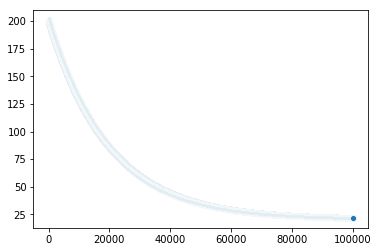

In [11]:
numIterations= 100000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations)